In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date
import geopandas as gpd
import geoplot
from dash import Dash, dcc, html, Input, Output

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/Users/Vi/Documents/qbus6860/Education-services-au-export.csv',na_values=['np','unknown'])
df

,ServiceApprovalNumber,Provider Approval Number,ServiceName,ProviderLegalName,ServiceType,ServiceAddress,Suburb,State,Postcode,Phone,...,Holiday Care Wednesday End Time,Holiday Care Thursday Start Time,Holiday Care Thursday End Time,Holiday Care Friday Start Time,Holiday Care Friday End Time,Holiday Care Saturday Start Time,Holiday Care Saturday End Time,Holiday Care Sunday Start Time,Holiday Care Sunday End Time,Temporarily Closed
0,SE-00000002,PR-00000898,Community Kids Waterford Early Education Centre,G8 Education Limited,Centre-Based Care,8-10 Allora St,WATERFORD WEST,QLD,4133.0,0732009852,...,18:15,06:15,18:15,06:15,18:15,NaN,NaN,NaN,NaN,No
1,SE-00000003,PR-40029099,KIDVENTURE EARLY LEARNING EAGLEBY,Table Mountain Trading Pty Ltd As The Trustee ...,Centre-Based Care,82 Fryar Road,EAGLEBY,QLD,4207.0,0738073222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,SE-00000004,PR-00000898,Community Kids - Broadbeach Waters,G8 Education Limited,Centre-Based Care,4 Fremar Street,BROADBEACH WATERS,QLD,4217.0,0755920306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,SE-00000005,PR-40002184,Little Scholars School of Early Learning Burle...,The Scholars Group Pty Ltd,Centre-Based Care,143 Christine Ave,BURLEIGH WATERS,QLD,4220.0,0755353288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,SE-00000006,PR-40029104,Small World Child Care Centre,A. & K. Massouras Pty. Ltd. ATF The A Massoura...,Centre-Based Care,113-115 Pappas Way,CARRARA,QLD,4211.0,07 5594 1844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17658,SE-40030578,PR-40037818,Amana OSHC Beaumont Hills,AMANA OSHC PTY LTD,Centre-Based Care,20-36 Mungerie Rd,BEAUMONT HILLS,NSW,2155.0,1300200262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
17659,SE-40030604,PR-40011948,Perfect Start Crestmead 2,BIRKDALE CHILD CARE CENTRE PTY LTD,Centre-Based Care,164-168 Clarke Rd,CRESTMEAD,QLD,4132.0,0735213444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
17660,SE-40030614,PR-40035741,Little Squiggles Early Learning Centre,Little Squiggles PTY LTD ATF Little Squiggles ...,Centre-Based Care,67 TURVEY ST,REVESBY,NSW,2212.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
17661,SE-40030632,PR-40011145,Tivoli State School TheirCare,TheirCare Pty Ltd,Centre-Based Care,"Tivoli State School, 108 Mt Crosby Road",TIVOLI,QLD,4305.0,1300072410,...,18:00,06:30,18:00,06:30,18:00,NaN,NaN,NaN,NaN,No


In [4]:
df.shape

(17663, 97)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17663 entries, 0 to 17662
Data columns (total 97 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ServiceApprovalNumber                             17663 non-null  object 
 1   Provider Approval Number                          17663 non-null  object 
 2   ServiceName                                       17663 non-null  object 
 3   ProviderLegalName                                 17556 non-null  object 
 4   ServiceType                                       17663 non-null  object 
 5   ServiceAddress                                    17653 non-null  object 
 6   Suburb                                            17653 non-null  object 
 7   State                                             17653 non-null  object 
 8   Postcode                                          17653 non-null  float64
 9   Phone            

In [6]:
df.isnull().sum()

ServiceApprovalNumber                   0
Provider Approval Number                0
ServiceName                             0
ProviderLegalName                     107
ServiceType                             0
                                    ...  
Holiday Care Saturday Start Time    17574
Holiday Care Saturday End Time      17574
Holiday Care Sunday Start Time      17604
Holiday Care Sunday End Time        17604
Temporarily Closed                      0
Length: 97, dtype: int64

In [7]:
df.describe()

,Postcode,NumberOfApprovedPlaces
count,17653.000000,17246.000000
mean,3557.282332,68.772875
std,1318.632409,40.184377
min,800.000000,2.000000
25%,2483.000000,40.000000
50%,3172.000000,60.000000
75%,4350.000000,90.000000
max,7467.000000,477.000000


In [8]:
df['Postcode']=df['Postcode'].astype(str)

In [9]:
df['Postcode'] = df['Postcode'].astype(str).str.replace(r'\.0+$', '', regex=True)

In [10]:
df = df[df['Postcode'].str.match(r'^\d{4}$')]

In [11]:
df['ServiceApprovalGrantedDate'] = pd.to_datetime(df['ServiceApprovalGrantedDate'],format='%d/%m/%Y')

In [12]:
df['NumberOfApprovedPlaces'] = pd.to_numeric(df['NumberOfApprovedPlaces'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17415 entries, 0 to 17662
Data columns (total 97 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   ServiceApprovalNumber                             17415 non-null  object        
 1   Provider Approval Number                          17415 non-null  object        
 2   ServiceName                                       17415 non-null  object        
 3   ProviderLegalName                                 17308 non-null  object        
 4   ServiceType                                       17415 non-null  object        
 5   ServiceAddress                                    17415 non-null  object        
 6   Suburb                                            17415 non-null  object        
 7   State                                             17415 non-null  object        
 8   Postcode                       

In [14]:

rating_mapping = {
    'Significant Improvement Required': 1,
    'Working Towards NQS': 2,
    'Meeting NQS': 3,
    'Exceeding NQS': 4,
    'Excellent': 5
}

Rating_Columns = [
    'QualityArea1Rating', 'QualityArea2Rating', 'QualityArea3Rating', 
    'QualityArea4Rating', 'QualityArea5Rating', 'QualityArea6Rating', 'QualityArea7Rating', 
    'OverallRating', 'PreviousQualityArea1Rating', 'PreviousQualityArea2Rating', 
    'PreviousQualityArea3Rating', 'PreviousQualityArea4Rating', 'PreviousQualityArea5Rating', 
    'PreviousQualityArea6Rating', 'PreviousQualityArea7Rating', 'PreviousOverallRating'
]

for col in Rating_Columns:
    new_col_name = col + "_Numeric"  
    df[new_col_name] = df[col].map(rating_mapping)

In [15]:
df['Preschool_Kindergarten'] = df[['Preschool/Kindergarten - Part of a School', 'Preschool/Kindergarten - Stand alone']].agg(' '.join, axis=1)

df.drop(['Preschool/Kindergarten - Part of a School', 'Preschool/Kindergarten - Stand alone'], axis=1, inplace=True)

In [16]:
df['Outside School Hours Care'] = df[['Outside school Hours Care - After School', 'Outside school Hours Care - Before School','Outside school Hours Care - Vacation Care']].agg(' '.join, axis=1)

df.drop(['Outside school Hours Care - After School', 'Outside school Hours Care - Before School','Outside school Hours Care - Vacation Care'], axis=1, inplace=True)

In [17]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 17415 entries, 0 to 17662
Data columns (total 110 columns):
 #    Column                                            Dtype         
---   ------                                            -----         
 0    ServiceApprovalNumber                             object        
 1    Provider Approval Number                          object        
 2    ServiceName                                       object        
 3    ProviderLegalName                                 object        
 4    ServiceType                                       object        
 5    ServiceAddress                                    object        
 6    Suburb                                            object        
 7    State                                             object        
 8    Postcode                                          object        
 9    Phone                                             object        
 10   Fax                                  

In [18]:
SQA = df[['ServiceType', 'Suburb','State','Postcode','QualityArea1Rating',
    'QualityArea2Rating', 'QualityArea3Rating', 'QualityArea4Rating',
    'QualityArea5Rating', 'QualityArea6Rating', 'QualityArea7Rating', 'OverallRating',
    'PreviousQualityArea1Rating', 'PreviousQualityArea2Rating',
    'PreviousQualityArea3Rating', 'PreviousQualityArea4Rating',
    'PreviousQualityArea5Rating', 'PreviousQualityArea6Rating',
    'PreviousQualityArea7Rating', 'PreviousOverallRating','QualityArea1Rating_Numeric', 'QualityArea2Rating_Numeric',
    'QualityArea3Rating_Numeric', 'QualityArea4Rating_Numeric',
    'QualityArea5Rating_Numeric', 'QualityArea6Rating_Numeric',
    'QualityArea7Rating_Numeric', 'OverallRating_Numeric',
    'PreviousQualityArea1Rating_Numeric', 'PreviousQualityArea2Rating_Numeric',
    'PreviousQualityArea3Rating_Numeric', 'PreviousQualityArea4Rating_Numeric',
    'PreviousQualityArea5Rating_Numeric', 'PreviousQualityArea6Rating_Numeric',
    'PreviousQualityArea7Rating_Numeric', 'PreviousOverallRating_Numeric',
    'Preschool_Kindergarten', 'Long Day Care', 'Outside School Hours Care', 'Other']]

In [19]:
AC = df[['Suburb', 'State', 'Postcode', 'NumberOfApprovedPlaces','QualityArea1Rating',
    'QualityArea2Rating', 'QualityArea3Rating', 'QualityArea4Rating',
    'QualityArea5Rating', 'QualityArea6Rating', 'QualityArea7Rating','OverallRating','QualityArea1Rating_Numeric', 'QualityArea2Rating_Numeric',
    'QualityArea3Rating_Numeric', 'QualityArea4Rating_Numeric',
    'QualityArea5Rating_Numeric', 'QualityArea6Rating_Numeric',
    'QualityArea7Rating_Numeric', 'OverallRating_Numeric']]

In [20]:
OT = df[['ServiceType', 'Suburb', 'State', 'Postcode', 'NumberOfApprovedPlaces','ServiceApprovalGrantedDate', 
    'QualityArea1Rating', 'QualityArea2Rating', 'QualityArea3Rating', 'QualityArea4Rating',
    'QualityArea5Rating', 'QualityArea6Rating', 'QualityArea7Rating', 'OverallRating','QualityArea1Rating_Numeric', 'QualityArea2Rating_Numeric',
    'QualityArea3Rating_Numeric', 'QualityArea4Rating_Numeric',
    'QualityArea5Rating_Numeric', 'QualityArea6Rating_Numeric',
    'QualityArea7Rating_Numeric', 'OverallRating_Numeric',
    'Long Day Care', 'Preschool_Kindergarten', 'Outside School Hours Care', 'Other',
    'Annual Monday Start Time', 'Annual Monday End Time',
    'Annual Tuesday Start Time', 'Annual Tuesday End Time',
    'Annual Wednesday Start Time', 'Annual Wednesday End Time',
    'Annual Thursday Start Time', 'Annual Thursday End Time',
    'Annual Friday Start Time', 'Annual Friday End Time',
    'Annual Saturday Start Time', 'Annual Saturday End Time',
    'Annual Sunday Start Time', 'Annual Sunday End Time']]

In [21]:
dataset = [SQA, AC, OT]
for i, df in enumerate(dataset, start=1):
    print(f"DataFrame {i}:")
    print(df.isnull().sum())
    print("-" * 40)

DataFrame 1:
ServiceType                              0
Suburb                                   0
State                                    0
Postcode                                 0
QualityArea1Rating                    1306
QualityArea2Rating                    1306
QualityArea3Rating                    1306
QualityArea4Rating                    1306
QualityArea5Rating                    1306
QualityArea6Rating                    1306
QualityArea7Rating                    1306
OverallRating                         1306
PreviousQualityArea1Rating            4482
PreviousQualityArea2Rating            4482
PreviousQualityArea3Rating            4482
PreviousQualityArea4Rating            4482
PreviousQualityArea5Rating            4482
PreviousQualityArea6Rating            4482
PreviousQualityArea7Rating            4482
PreviousOverallRating                 4482
QualityArea1Rating_Numeric            1306
QualityArea2Rating_Numeric            1306
QualityArea3Rating_Numeric            130

Data1

In [22]:
Quality_Rating = ['QualityArea1Rating','QualityArea2Rating',
                  'QualityArea3Rating','QualityArea4Rating',
                  'QualityArea5Rating','QualityArea6Rating',
                  'QualityArea7Rating','OverallRating',]

Previous_Quality_Rating = ['PreviousQualityArea1Rating',
'PreviousQualityArea2Rating','PreviousQualityArea3Rating', 
'PreviousQualityArea4Rating','PreviousQualityArea5Rating',
'PreviousQualityArea6Rating','PreviousQualityArea7Rating',
'PreviousOverallRating']
#Removing Missing Values
SQA = SQA.dropna(subset=Quality_Rating)
SQA = SQA.dropna(subset=Previous_Quality_Rating)
#Remove duplicate rows
SQA = SQA.drop_duplicates()
SQA.reset_index(drop=True,inplace=True)

SQA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12308 entries, 0 to 12307
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ServiceType                         12308 non-null  object 
 1   Suburb                              12308 non-null  object 
 2   State                               12308 non-null  object 
 3   Postcode                            12308 non-null  object 
 4   QualityArea1Rating                  12308 non-null  object 
 5   QualityArea2Rating                  12308 non-null  object 
 6   QualityArea3Rating                  12308 non-null  object 
 7   QualityArea4Rating                  12308 non-null  object 
 8   QualityArea5Rating                  12308 non-null  object 
 9   QualityArea6Rating                  12308 non-null  object 
 10  QualityArea7Rating                  12308 non-null  object 
 11  OverallRating                       12308

In [23]:
SQA['OverallRating'].unique()

array(['Meeting NQS', 'Working Towards NQS', 'Exceeding NQS', 'Excellent',
       'Significant Improvement Required'], dtype=object)

Data2

In [24]:
# Missing values for NumberOfApprovedPlaces are filled in with the median value.
median_approved_places = AC['NumberOfApprovedPlaces'].median()
AC['NumberOfApprovedPlaces'].fillna(median_approved_places, inplace=True)

#  Removal of missing values for QualityArea and OverallRating
AC.dropna(subset=Quality_Rating,inplace=True)

# Delete of duplicate rows
AC = AC.drop_duplicates()

# reset index
AC.reset_index(drop=True, inplace=True)


In [25]:
# Calculate the lower and upper bounds of the IQR
Q1 = AC['NumberOfApprovedPlaces'].quantile(0.25)
Q3 = AC['NumberOfApprovedPlaces'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

AC['NumberOfApprovedPlaces'] = AC['NumberOfApprovedPlaces'].clip(lower=lower_bound, upper=upper_bound)

Data3

In [26]:
median_val = OT['NumberOfApprovedPlaces'].median()
OT['NumberOfApprovedPlaces'].fillna(median_val, inplace=True)

In [27]:
OT = OT.dropna(subset=Quality_Rating)
OT = OT.dropna(subset=['ServiceApprovalGrantedDate'])

In [28]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [29]:
Q1 = OT['NumberOfApprovedPlaces'].quantile(0.25)
Q3 = OT['NumberOfApprovedPlaces'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

OT['NumberOfApprovedPlaces'] = OT['NumberOfApprovedPlaces'].clip(lower=lower_bound, upper=upper_bound)

In [30]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for d in days:
    s = OT[f'Annual {d} Start Time'].astype(str).str.split(':', expand=True)
    e = OT[f'Annual {d} End Time'].astype(str).str.split(':', expand=True)

    s = s.astype(float)
    e = e.astype(float)

    # Hours = hours + minutes/60
    start_hours = s[0] + s[1].div(60)
    end_hours   = e[0] + e[1].div(60)

    OT[f'{d}_Hours'] = end_hours - start_hours

    #Stacked total hours for the week
OT['Weekly_Total_Hours'] = OT[[f'{d}_Hours' for d in days]].sum(axis=1, skipna=True)


Q1 = OT['Weekly_Total_Hours'].quantile(0.25)
Q3 = OT['Weekly_Total_Hours'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR

# drop rows with total time ≤ 0
OT = OT.loc[OT['Weekly_Total_Hours'] > 0]

# Cleaning up the middle column
OT.drop(columns=[f'{d}_Hours' for d in days] +
                      [f'Annual {d} Start Time' for d in days] +
                      [f'Annual {d} End Time'   for d in days],
             inplace=True)

Q1 = OT['Weekly_Total_Hours'].quantile(0.25)
Q3 = OT['Weekly_Total_Hours'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Q1

In [31]:
color_dict = {'Excellent' :'#FFF8DC','Exceeding NQS':'#DC143C','Meeting NQS':'#1E90FF','Working Towards NQS':'#9932CC','Significant Improvement Required':'#F08080','Provisional - Not Yet Assessed':'#FF8C00'}

In [32]:
color_order = ['Excellent','Exceeding NQS','Meeting NQS','Working Towards NQS','Significant Improvement Required','Provisional - Not Yet Assessed']

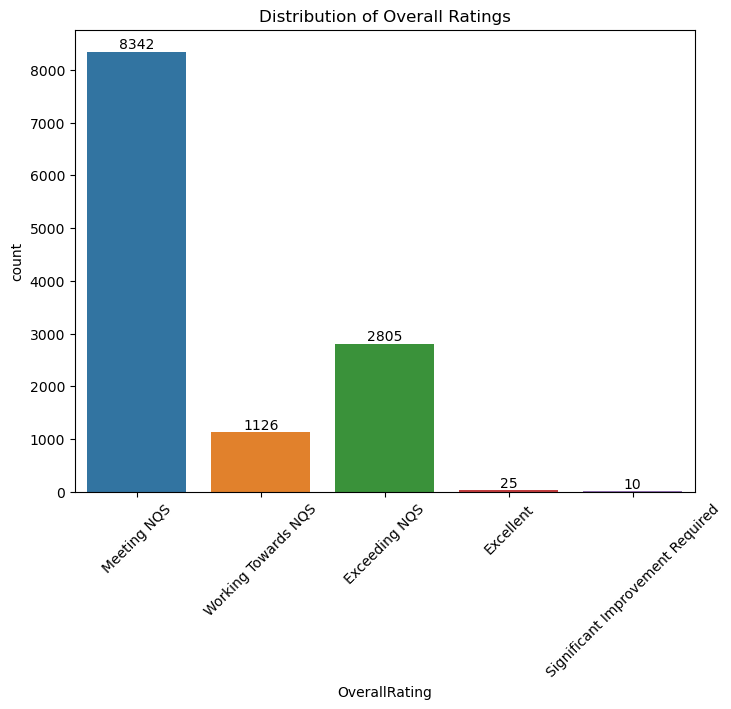

In [33]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x='OverallRating',data=SQA)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of Overall Ratings')
plt.xticks(rotation=45)
plt.show()

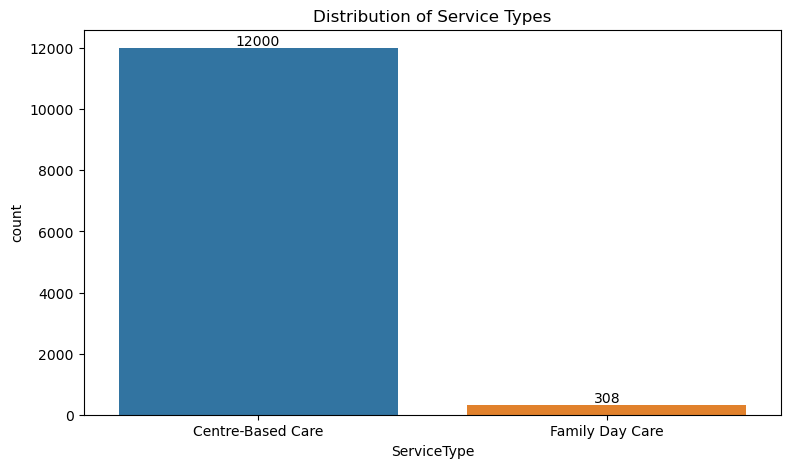

In [34]:
plt.figure(figsize=(9,5))

ax = sns.countplot(x='ServiceType',data = SQA)
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Distribution of Service Types')

plt.show()

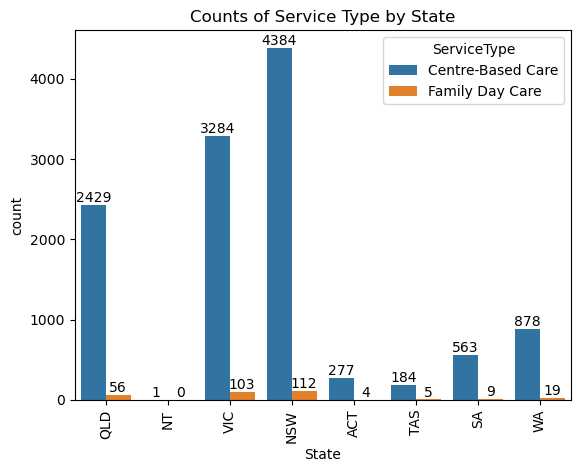

In [35]:
ax = sns.countplot(data=SQA,x='State',hue='ServiceType')
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Counts of Service Type by State')
plt.xticks(rotation=90)
plt.show()

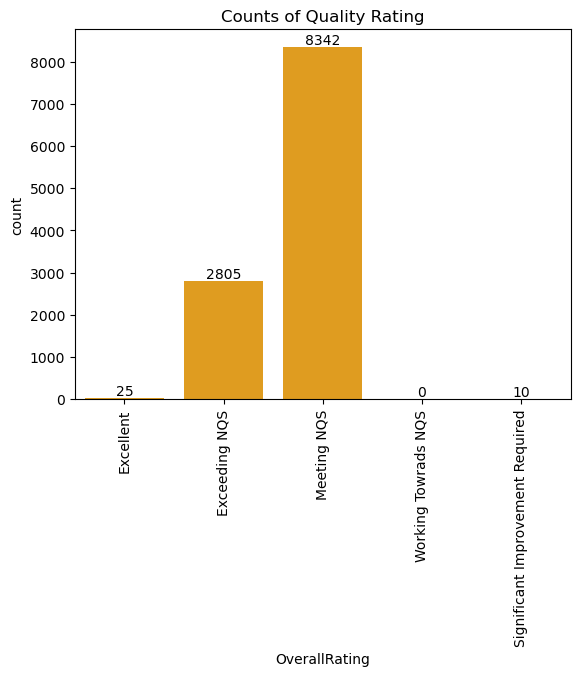

In [36]:
Quality_Rating_Rank = ['Excellent','Exceeding NQS', 'Meeting NQS','Working Towrads NQS','Significant Improvement Required']

ax = sns.countplot(x='OverallRating', data = SQA, color = 'orange', order = Quality_Rating_Rank)

for i in ax.containers:
    ax.bar_label(i,)

plt.title('Counts of Quality Rating')
plt.xticks(rotation=90)
plt.show()

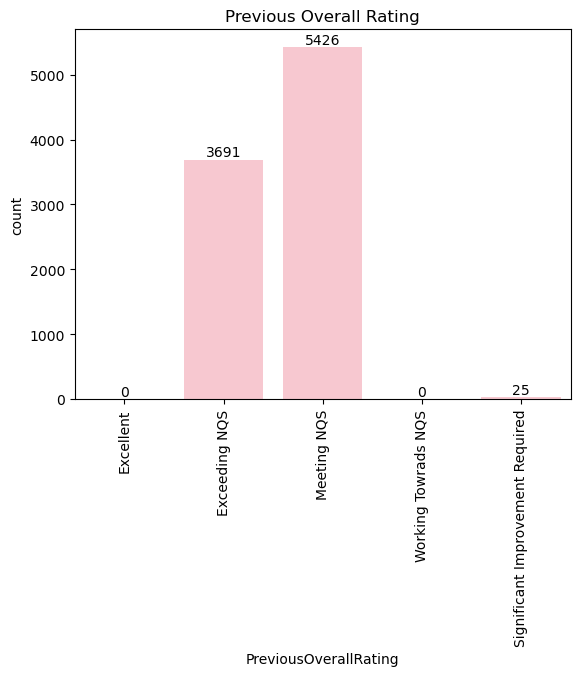

In [37]:
ax = sns.countplot(x = 'PreviousOverallRating',data = SQA, color ='Pink',order=Quality_Rating_Rank)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Previous Overall Rating')
plt.xticks(rotation=90)
plt.show()

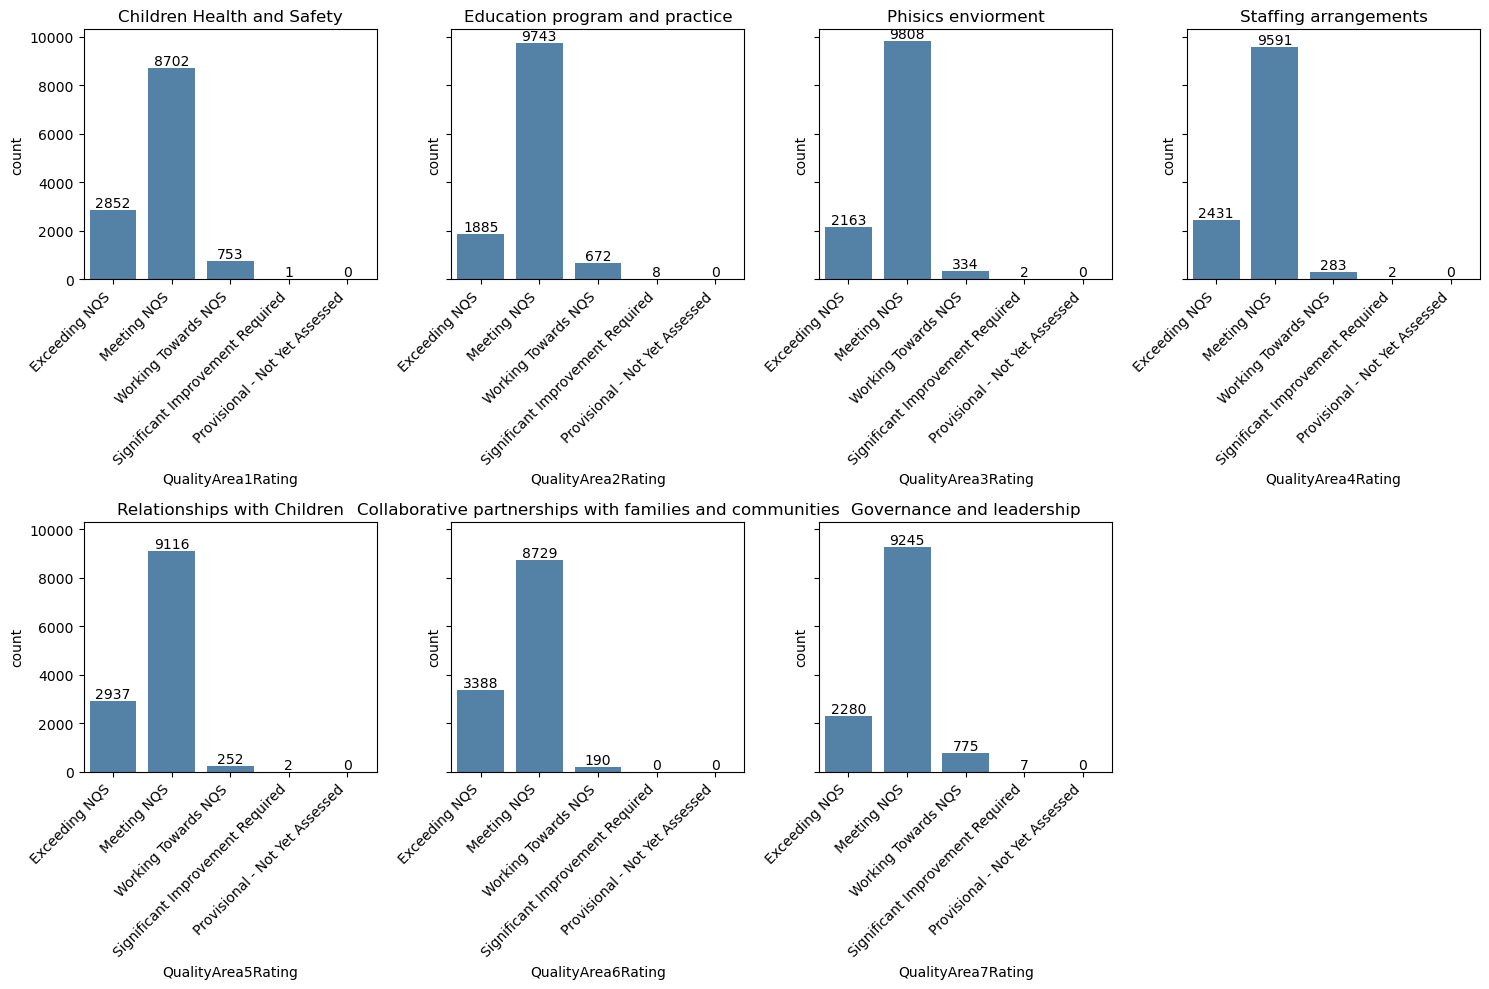

In [38]:
Quality_Rating_Rank = [
    'Exceeding NQS','Meeting NQS','Working Towards NQS',
    'Significant Improvement Required','Provisional - Not Yet Assessed'
]

# your seven columns and a descriptive title for each
quality_cols = [
    'QualityArea1Rating','QualityArea2Rating','QualityArea3Rating',
    'QualityArea4Rating','QualityArea5Rating','QualityArea6Rating',
    'QualityArea7Rating'
]
titles = [
    'Children Health and Safety',
    'Education program and practice',
    'Phisics enviorment',
    'Staffing arrangements',
    'Relationships with Children',
    'Collaborative partnerships with families and communities',
    'Governance and leadership'
]

# create a grid: here 2 rows × 4 columns (one empty)
fig, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)
axes = axes.flatten()

for ax, col, title in zip(axes, quality_cols, titles):
    sns.countplot(
        x=col, 
        data=SQA, 
        order=Quality_Rating_Rank, 
        ax=ax,
        color='steelblue'
    )
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# turn off the unused subplot (the 8th one)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


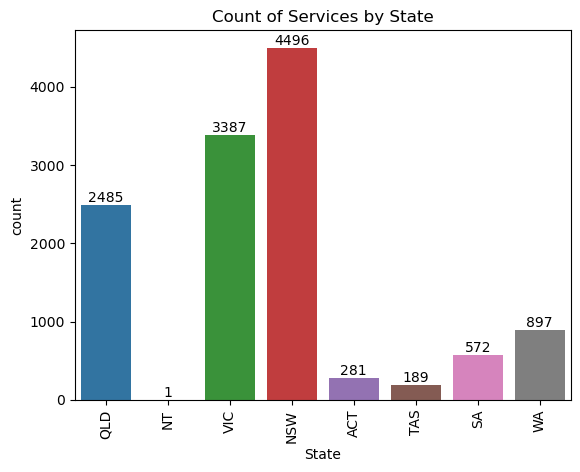

In [39]:
ax = sns.countplot(x='State',data=SQA)
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Count of Services by State')
plt.xticks(rotation=90)
plt.show()

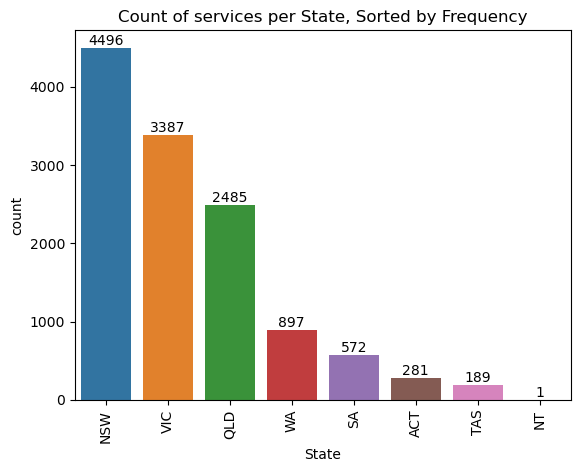

In [40]:
ax = sns.countplot(x='State',data=SQA,order=SQA['State'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Count of services per State, Sorted by Frequency')
plt.xticks(rotation=90)
plt.show()

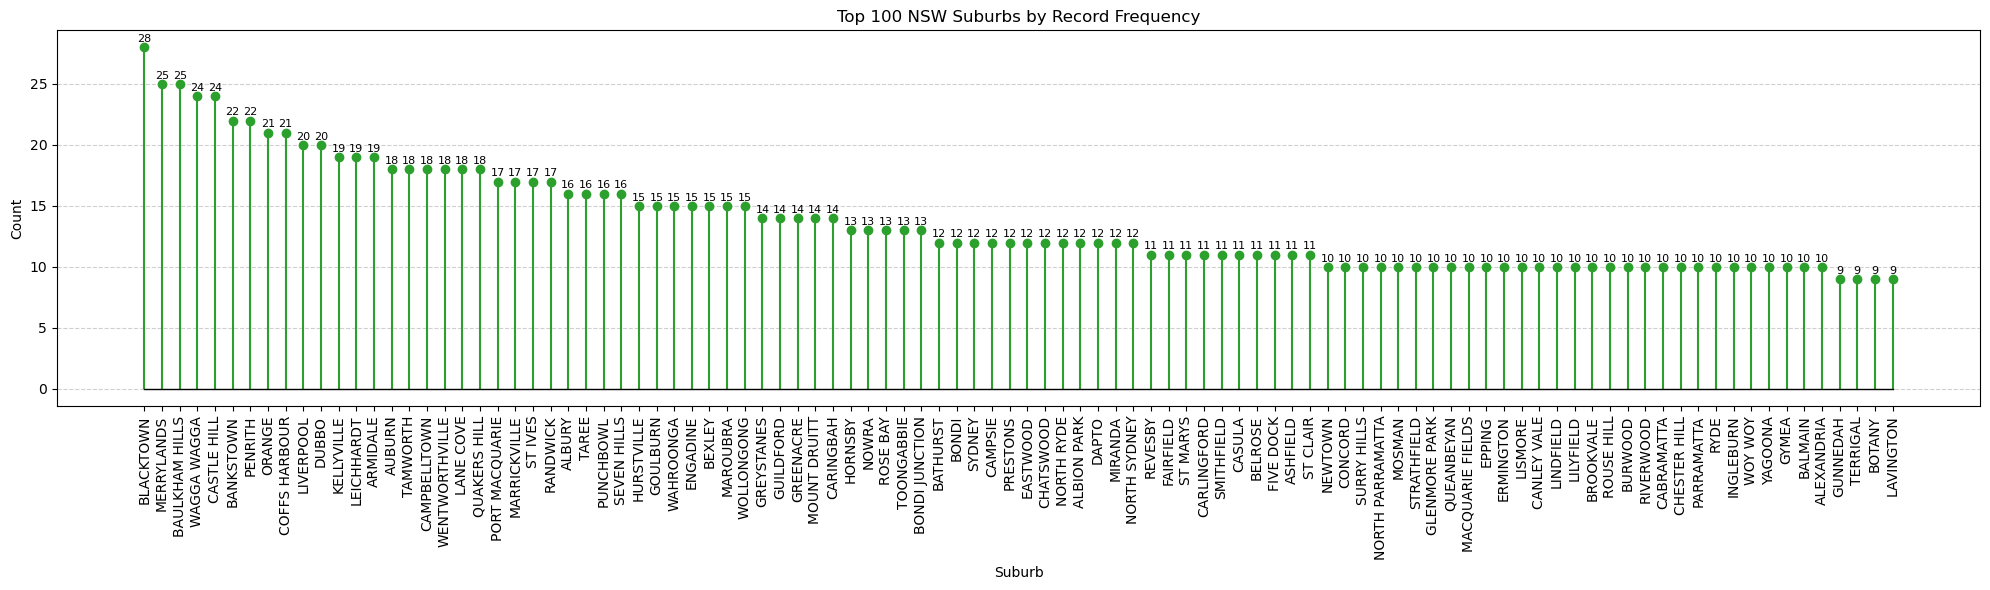

In [41]:
freq = SQA[SQA['State']=='NSW'].value_counts('Suburb').nlargest(100)

plt.figure(figsize=(20,6))
markerline, stemlines, baseline = plt.stem(
    freq.values,
    linefmt='C2-',       
    markerfmt='C2o',     
    basefmt='k-'         
)

plt.setp(markerline, markersize=6)
plt.setp(baseline, linewidth=1)

for x, y in enumerate(freq.values):
    plt.text(x, y + freq.values.max()*0.01,
             str(y), ha='center', va='bottom', fontsize=8)

plt.xticks(range(len(freq.index)), freq.index, rotation=90)
plt.title('Top 100 NSW Suburbs by Record Frequency')
plt.xlabel('Suburb')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


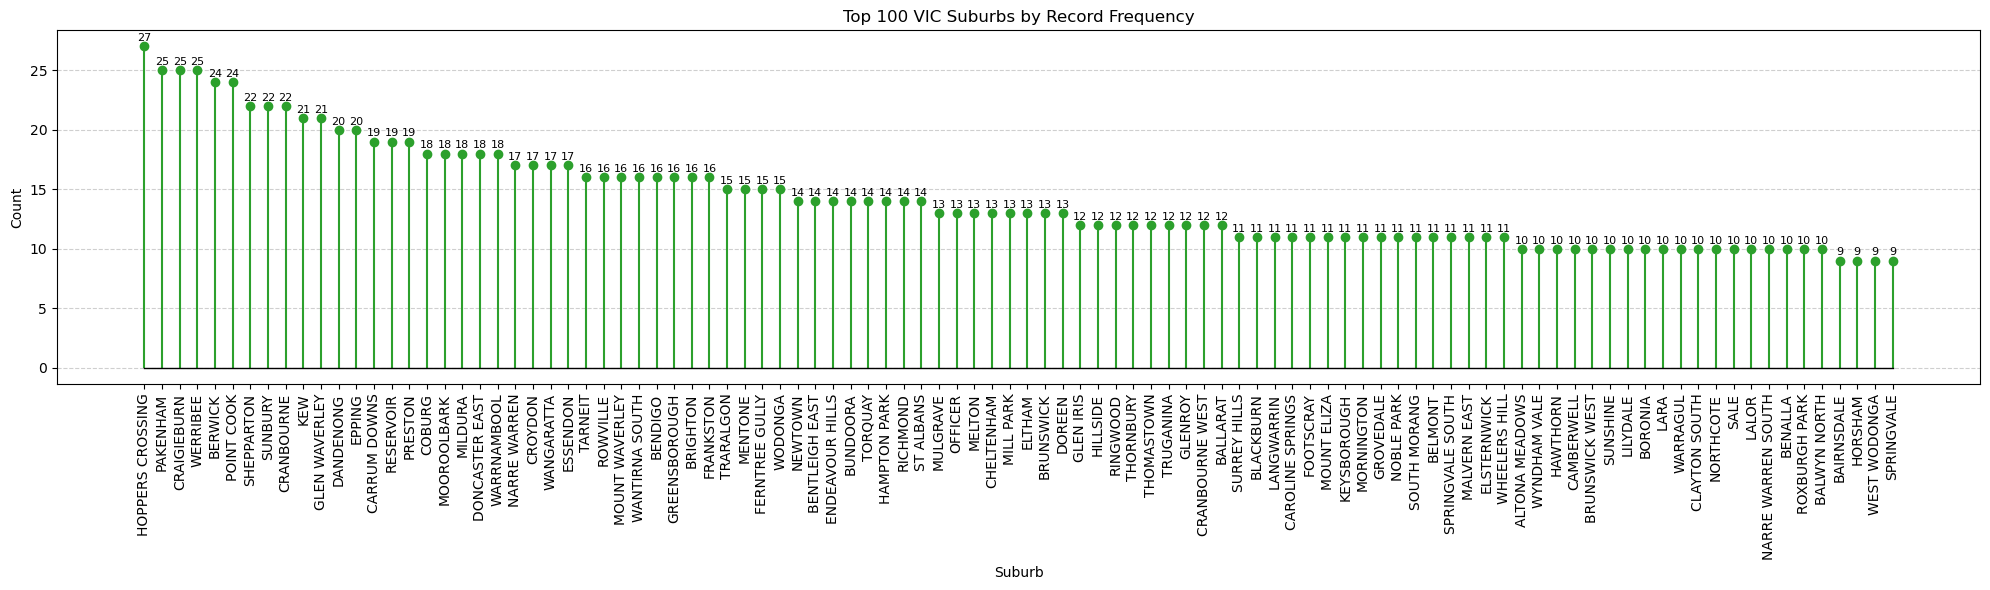

In [42]:
freq = SQA[SQA['State']=='VIC'].value_counts('Suburb').nlargest(100)

plt.figure(figsize=(20,6))
markerline, stemlines, baseline = plt.stem(
    freq.values,
    linefmt='C2-',       
    markerfmt='C2o',     
    basefmt='k-'         
)

plt.setp(markerline, markersize=6)
plt.setp(baseline, linewidth=1)

for x, y in enumerate(freq.values):
    plt.text(x, y + freq.values.max()*0.01,
             str(y), ha='center', va='bottom', fontsize=8)

plt.xticks(range(len(freq.index)), freq.index, rotation=90)
plt.title('Top 100 VIC Suburbs by Record Frequency')
plt.xlabel('Suburb')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

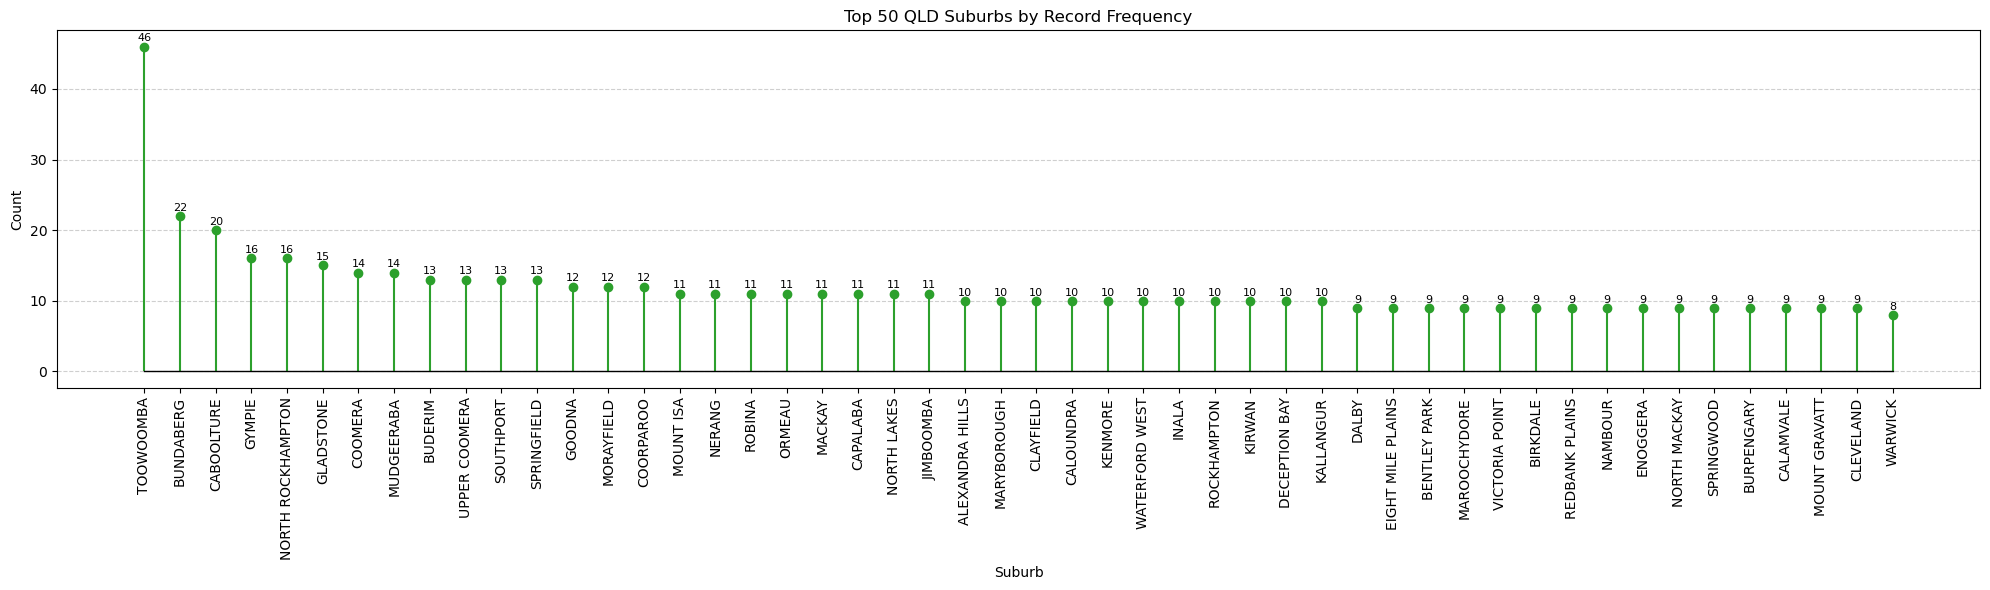

In [43]:
freq = SQA[SQA['State']=='QLD'].value_counts('Suburb').nlargest(50)

plt.figure(figsize=(20,6))
markerline, stemlines, baseline = plt.stem(
    freq.values,
    linefmt='C2-',       
    markerfmt='C2o',     
    basefmt='k-'         
)

plt.setp(markerline, markersize=6)
plt.setp(baseline, linewidth=1)

for x, y in enumerate(freq.values):
    plt.text(x, y + freq.values.max()*0.01,
             str(y), ha='center', va='bottom', fontsize=8)

plt.xticks(range(len(freq.index)), freq.index, rotation=90)
plt.title('Top 50 QLD Suburbs by Record Frequency')
plt.xlabel('Suburb')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [44]:
SQA.columns

Index(['ServiceType', 'Suburb', 'State', 'Postcode', 'QualityArea1Rating',
       'QualityArea2Rating', 'QualityArea3Rating', 'QualityArea4Rating',
       'QualityArea5Rating', 'QualityArea6Rating', 'QualityArea7Rating',
       'OverallRating', 'PreviousQualityArea1Rating',
       'PreviousQualityArea2Rating', 'PreviousQualityArea3Rating',
       'PreviousQualityArea4Rating', 'PreviousQualityArea5Rating',
       'PreviousQualityArea6Rating', 'PreviousQualityArea7Rating',
       'PreviousOverallRating', 'QualityArea1Rating_Numeric',
       'QualityArea2Rating_Numeric', 'QualityArea3Rating_Numeric',
       'QualityArea4Rating_Numeric', 'QualityArea5Rating_Numeric',
       'QualityArea6Rating_Numeric', 'QualityArea7Rating_Numeric',
       'OverallRating_Numeric', 'PreviousQualityArea1Rating_Numeric',
       'PreviousQualityArea2Rating_Numeric',
       'PreviousQualityArea3Rating_Numeric',
       'PreviousQualityArea4Rating_Numeric',
       'PreviousQualityArea5Rating_Numeric',
       'Pre

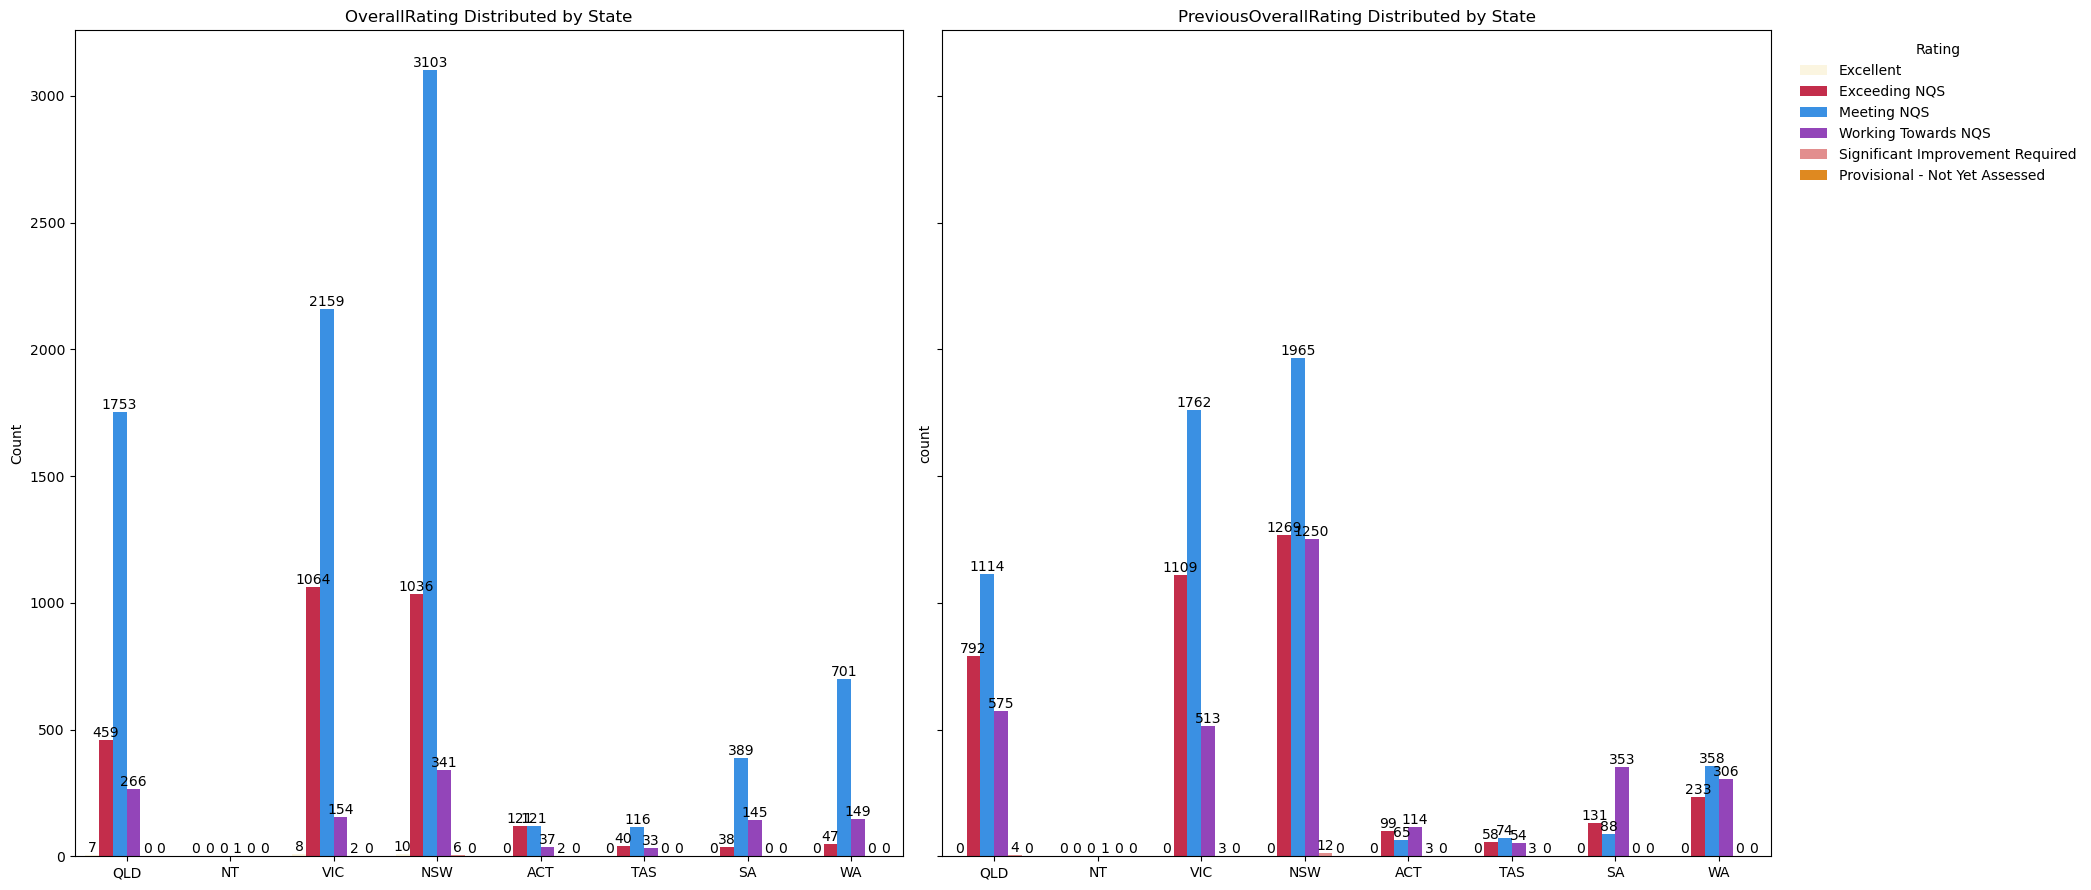

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(21, 9), sharey=True)

sns.countplot(
    data=SQA,
    x='State',
    hue='OverallRating',
    hue_order=color_order,
    palette=color_dict,
    ax=axes[0]
)
axes[0].set_title('OverallRating Distributed by State')
axes[0].set_xlabel('')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

axes[0].get_legend().remove()
for c in axes[0].containers:
    axes[0].bar_label(c, label_type='edge')

# PreviousOverallRating by State
sns.countplot(
    data=SQA,
    x='State',
    hue='PreviousOverallRating',
    hue_order=color_order,
    palette=color_dict,
    ax=axes[1]
)
axes[1].set_title('PreviousOverallRating Distributed by State')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=0)
axes[1].get_legend().remove()
for c in axes[1].containers:
    axes[1].bar_label(c, label_type='edge')

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(
    handles, labels,
    title='Rating',
    loc='center left',
    bbox_to_anchor=(1.02, 0.9),
    frameon=False
)

plt.tight_layout()
plt.show()


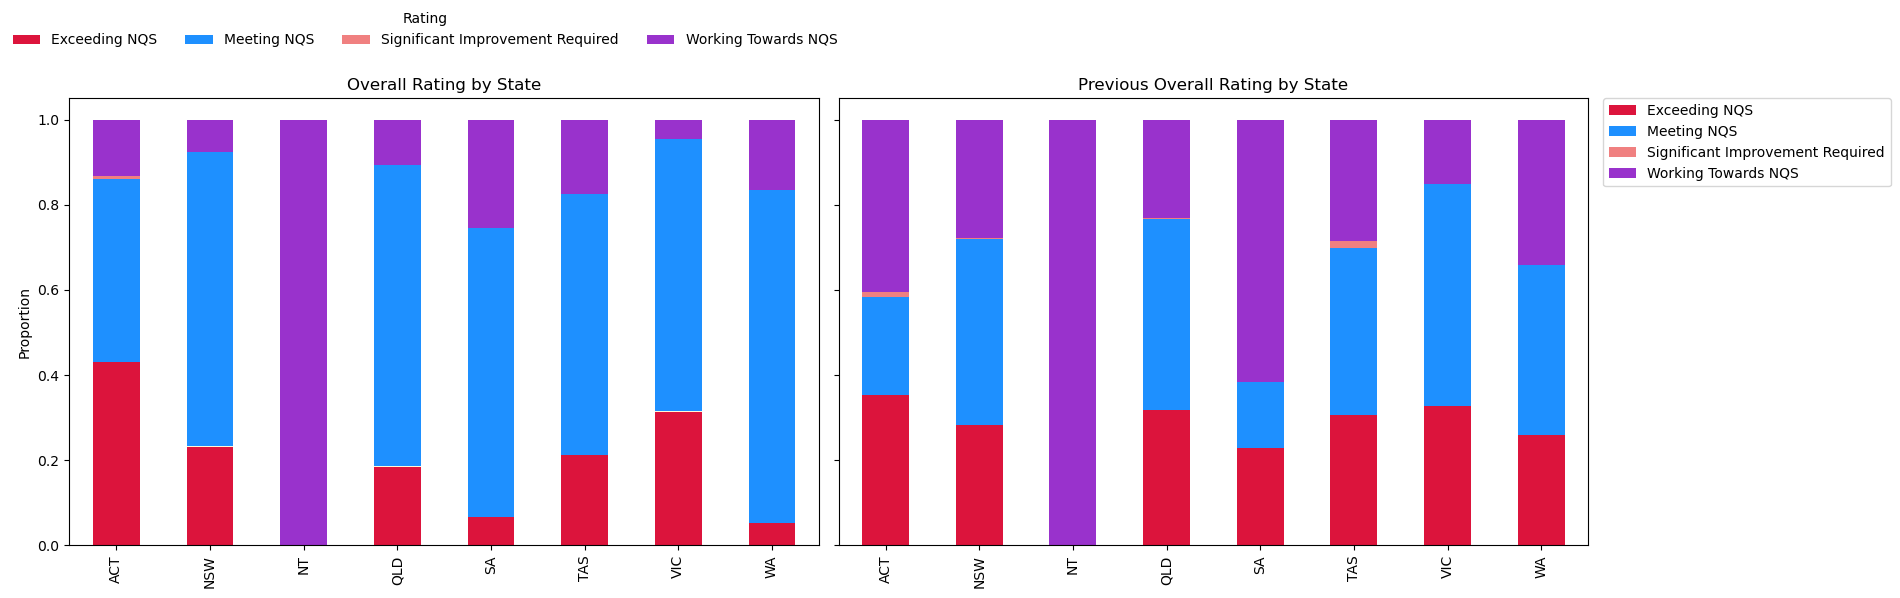

In [46]:
ax1 = pd.crosstab(
    SQA['State'],
    SQA['OverallRating'],
    normalize='index'
)
ax2 = pd.crosstab(
    SQA['State'],
    SQA['PreviousOverallRating'],
    normalize='index'
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

ax1.plot(
    kind='bar',
    stacked=True,
    color=color_dict,
    ax=axes[0]
)
axes[0].set_title('Overall Rating by State')
axes[0].set_xlabel('')
axes[0].set_ylabel('Proportion')
axes[0].tick_params(axis='x', rotation=90)
axes[0].get_legend().remove()

ax2.plot(
    kind='bar',
    stacked=True,
    color=color_dict,
    ax=axes[1]
)
axes[1].set_title('Previous Overall Rating by State')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=90)
axes[1].get_legend().remove()

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title='Rating',
    loc='upper left',
    ncol=len(labels),
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

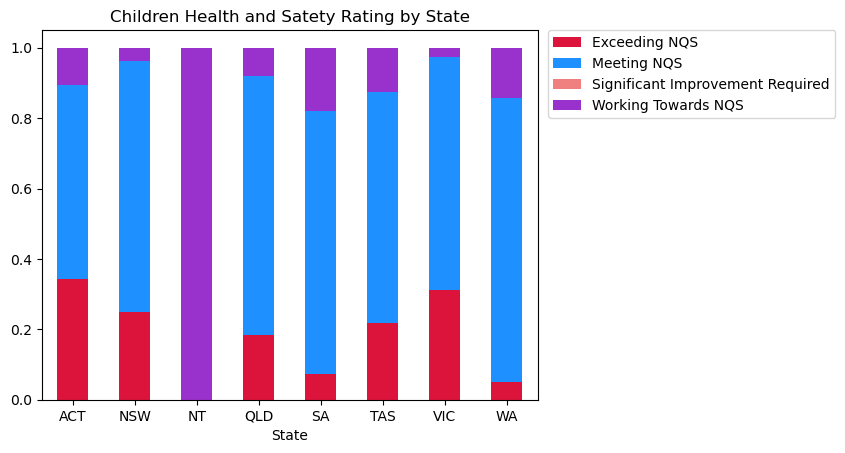

In [47]:
chs = pd.crosstab(SQA['State'],SQA['QualityArea1Rating'],normalize='index')

chs.plot(kind='bar',stacked=True,color=color_dict,)

plt.title('Children Health and Satety Rating by State')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

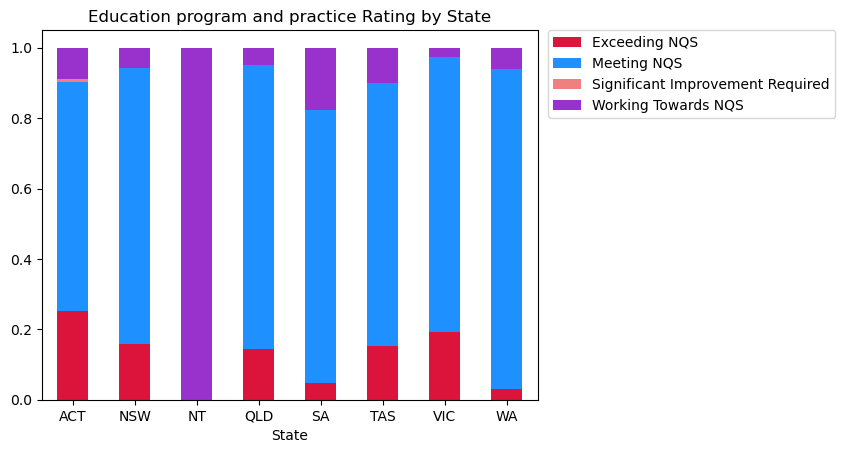

In [48]:
epp = pd.crosstab(SQA['State'],SQA['QualityArea2Rating'],normalize='index')

epp.plot(kind='bar',stacked=True,color=color_dict)
plt.title('Education program and practice Rating by State')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

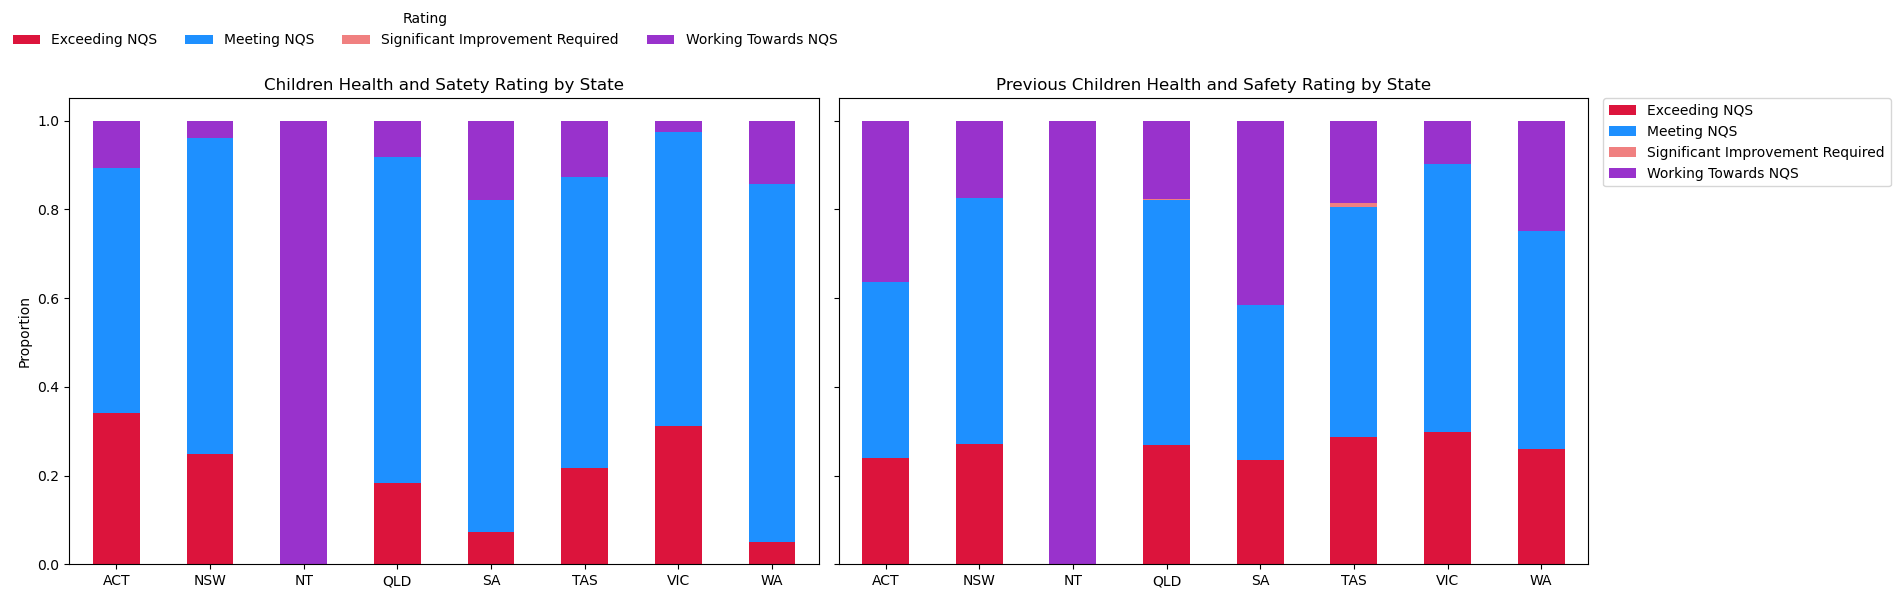

In [49]:
ax1 = pd.crosstab(
    SQA['State'],
    SQA['QualityArea1Rating'],
    normalize='index'
)
ax2 = pd.crosstab(
    SQA['State'],
    SQA['PreviousQualityArea1Rating'],
    normalize='index'
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

ax1.plot(
    kind='bar',
    stacked=True,
    color=color_dict,
    ax=axes[0]
)
axes[0].set_title('Children Health and Satety Rating by State')
axes[0].set_xlabel('')
axes[0].set_ylabel('Proportion')
axes[0].tick_params(axis='x', rotation=0)
axes[0].get_legend().remove()

ax2.plot(
    kind='bar',
    stacked=True,
    color=color_dict,
    ax=axes[1]
)
axes[1].set_title('Previous Children Health and Safety Rating by State')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=0)
axes[1].get_legend().remove()

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title='Rating',
    loc='upper left',
    ncol=len(labels),
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

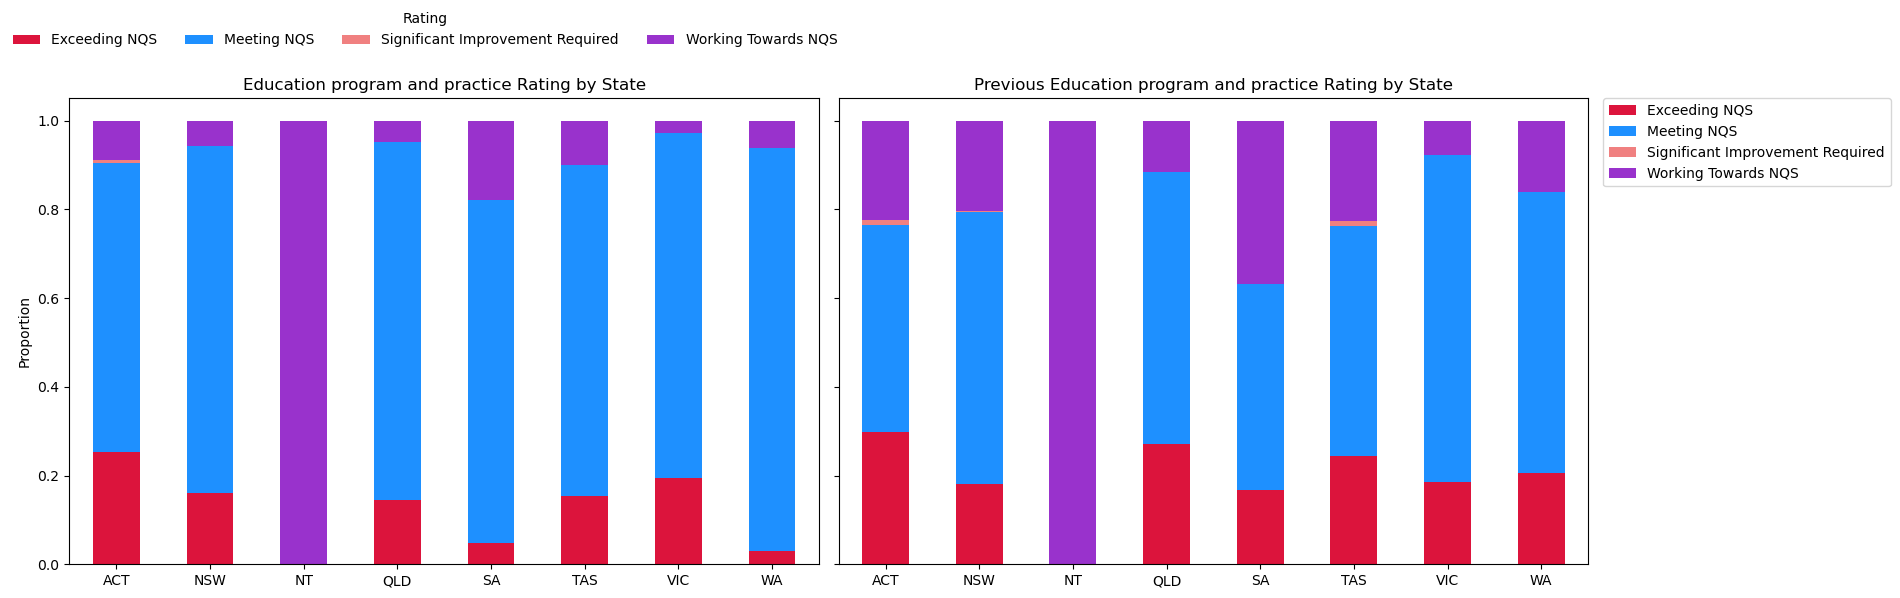

In [50]:
ax1 = pd.crosstab(
    SQA['State'],
    SQA['QualityArea2Rating'],
    normalize='index'
)
ax2 = pd.crosstab(
    SQA['State'],
    SQA['PreviousQualityArea2Rating'],
    normalize='index'
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

ax1.plot(
    kind='bar',
    stacked=True,
    color=color_dict,
    ax=axes[0]
)
axes[0].set_title('Education program and practice Rating by State')
axes[0].set_xlabel('')
axes[0].set_ylabel('Proportion')
axes[0].tick_params(axis='x', rotation=0)
axes[0].get_legend().remove()

ax2.plot(
    kind='bar',
    stacked=True,
    color=color_dict,
    ax=axes[1]
)
axes[1].set_title('Previous Education program and practice Rating by State')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=0)
axes[1].get_legend().remove()

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title='Rating',
    loc='upper left',
    ncol=len(labels),
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

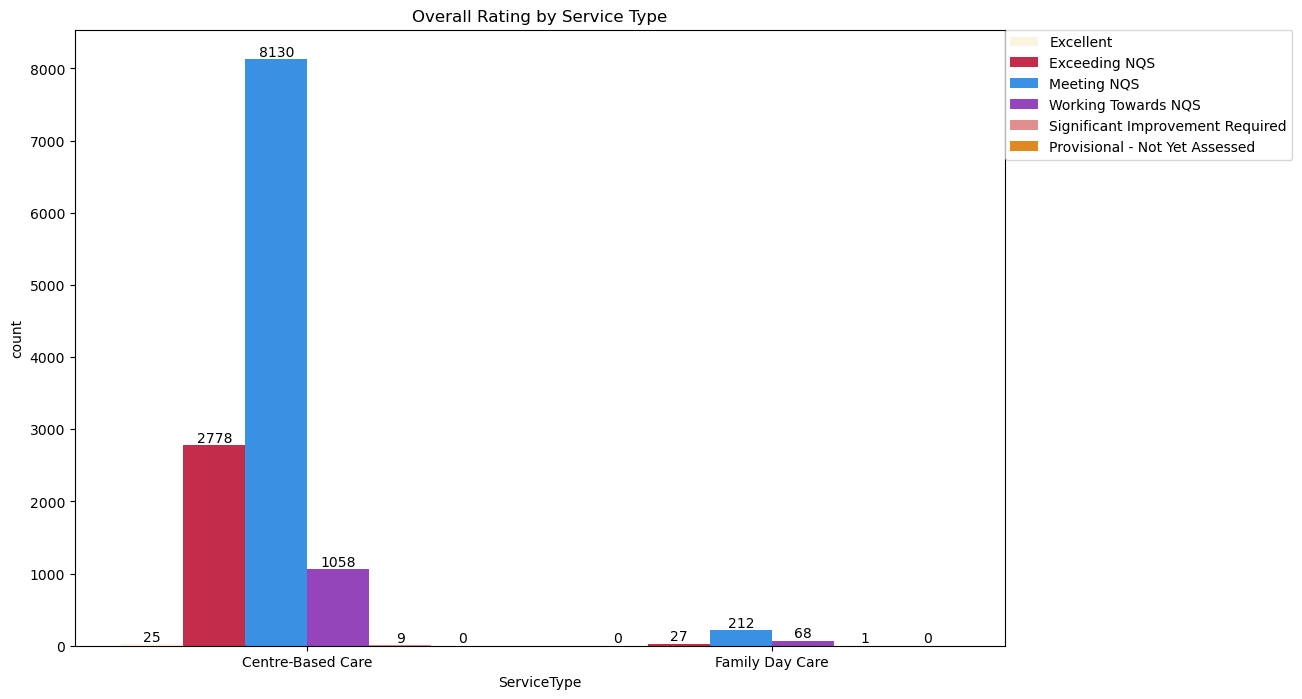

In [51]:
plt.figure(figsize=(12,8))

ax = sns.countplot(data=SQA,x='ServiceType',hue='OverallRating',hue_order = color_order,palette=color_dict)
for i in ax.containers:
    ax.bar_label(i,)

plt.legend(bbox_to_anchor=(1,1),loc='upper left',borderaxespad=0)
plt.title('Overall Rating by Service Type')
plt.xticks(rotation=0)
plt.show()

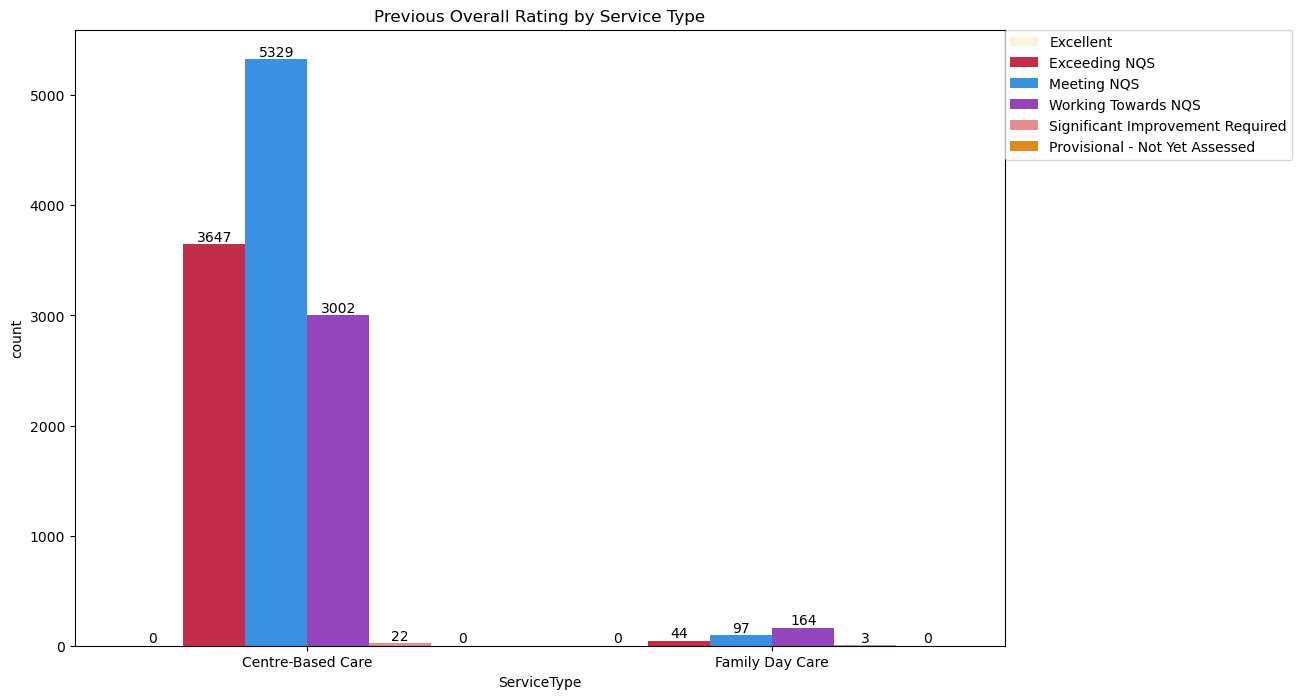

In [52]:
plt.figure(figsize=(12,8))

ax = sns.countplot(data=SQA,x='ServiceType',hue='PreviousOverallRating',hue_order = color_order,palette=color_dict)
for i in ax.containers:
    ax.bar_label(i,)

plt.legend(bbox_to_anchor=(1,1),loc='upper left',borderaxespad=0)
plt.title('Previous Overall Rating by Service Type')
plt.xticks(rotation=0)
plt.show()

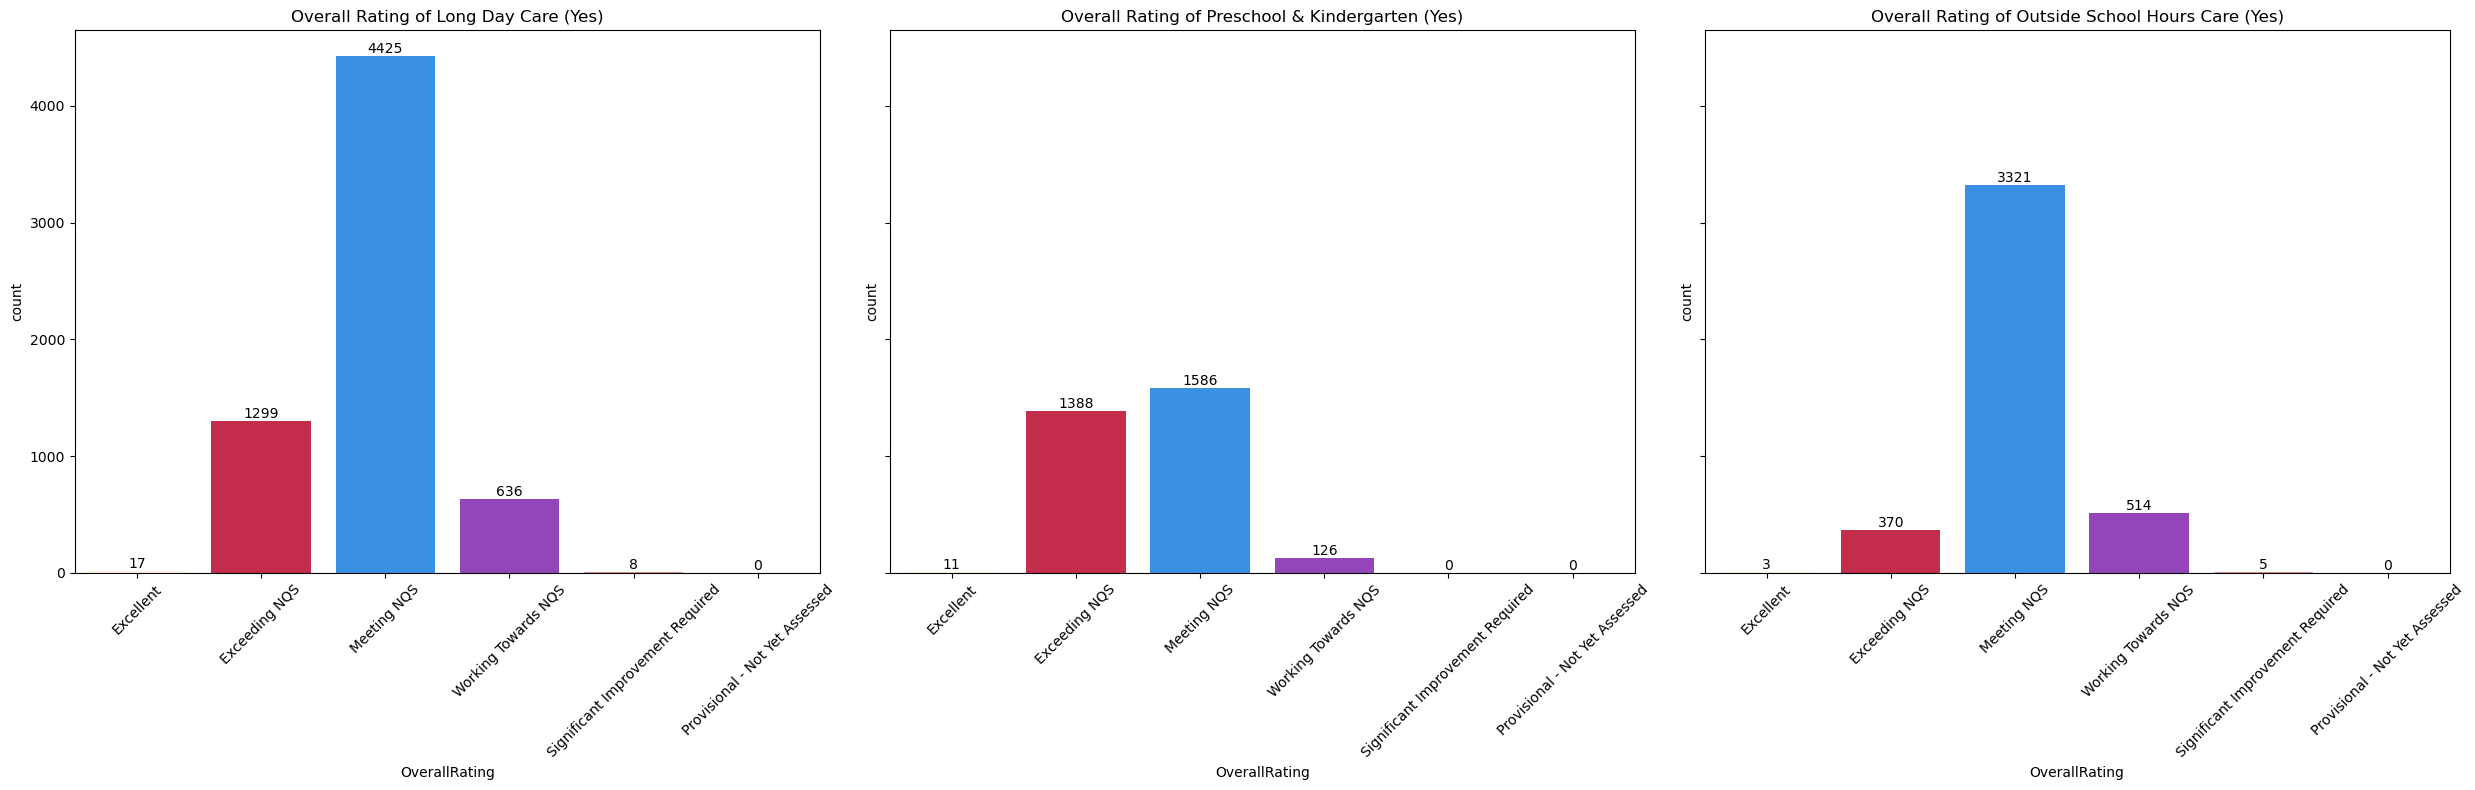

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

ldc  = SQA[SQA['Long Day Care']               == 'Yes']
dfps = SQA[SQA['Preschool_Kindergarten'].str.contains('Yes', na=False)]
oshc = SQA[SQA['Outside School Hours Care'] .str.contains('Yes', na=False)]

subsets = [
    (ldc,  'Long Day Care'),
    (dfps, 'Preschool & Kindergarten'),
    (oshc, 'Outside School Hours Care')
]

fig, axes = plt.subplots(1, 3, figsize=(25, 8), sharey=True)

for ax, (data, label) in zip(axes, subsets):
    sns.countplot(
        data=data,
        x='OverallRating',
        order=color_order,
        palette=color_dict,
        ax=ax
    )
    
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_title(f'Overall Rating of {label} (Yes)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


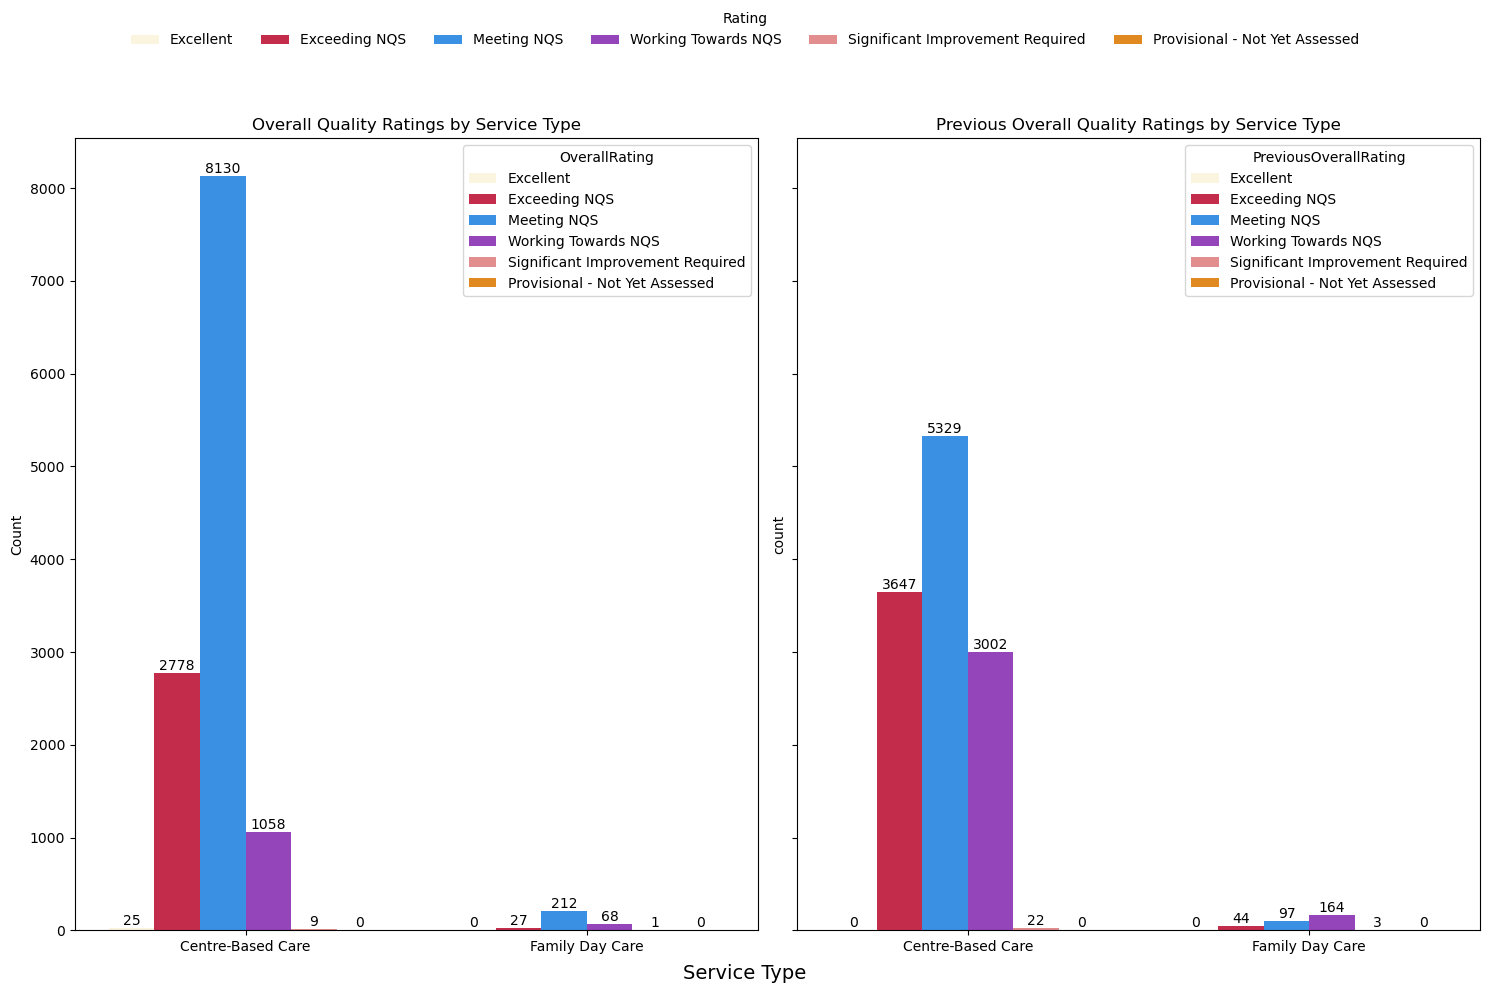

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)

sns.countplot(
    data=SQA,
    x='ServiceType',
    hue='OverallRating',
    hue_order=color_order,
    palette=color_dict,
    ax=axes[0]
)
axes[0].set_title('Overall Quality Ratings by Service Type')
axes[0].set_xlabel('')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge')

sns.countplot(
    data=SQA,
    x='ServiceType',
    hue='PreviousOverallRating',      
    hue_order=color_order,
    palette=color_dict,
    ax=axes[1]
)
axes[1].set_title('Previous Overall Quality Ratings by Service Type')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=0)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', label_type='edge')

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title='Rating',
    loc='upper center',
    ncol=len(color_order),
    frameon=False
)
fig.supxlabel('Service Type', fontsize=14, y=0.02)

plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.show()


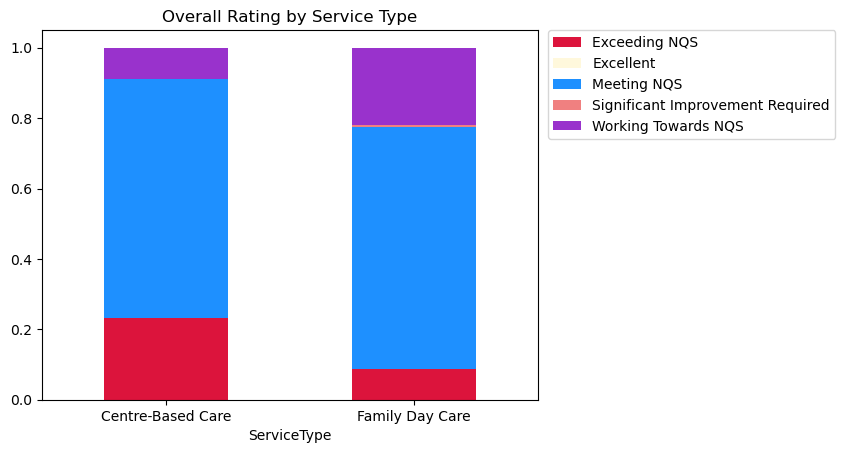

In [55]:
dfct = pd.crosstab(SQA['ServiceType'],SQA['OverallRating'],normalize='index')
dfct.plot(kind= 'bar',stacked = True, color = color_dict)
plt.legend(bbox_to_anchor=(1.02,1),loc = 'upper left',borderaxespad=0)
plt.title('Overall Rating by Service Type')
plt.xticks(rotation=0)
plt.show()

# Q2

In [56]:
import pandas as pd
import geopandas as gpd

In [57]:
aus = gpd.read_file("/Users/Vi/Documents/POA_2021_AUST_GDA2020_SHP")
aus = aus.dropna()
aus.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2641 entries, 0 to 2640
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   POA_CODE21  2641 non-null   object  
 1   POA_NAME21  2641 non-null   object  
 2   AUS_CODE21  2641 non-null   object  
 3   AUS_NAME21  2641 non-null   object  
 4   AREASQKM21  2641 non-null   float64 
 5   LOCI_URI21  2641 non-null   object  
 6   SHAPE_Leng  2641 non-null   float64 
 7   SHAPE_Area  2641 non-null   float64 
 8   geometry    2641 non-null   geometry
dtypes: float64(3), geometry(1), object(5)
memory usage: 206.3+ KB


In [58]:
aus.geometry = aus.geometry.simplify(0.001)
aus

,POA_CODE21,POA_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry
0,0800,0800,AUS,Australia,3.1731,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.081893,0.000264,"POLYGON ((130.83643 -12.45597, 130.83768 -12.4..."
1,0810,0810,AUS,Australia,24.4283,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.241859,0.002031,"POLYGON ((130.89986 -12.36567, 130.89232 -12.3..."
2,0812,0812,AUS,Australia,35.8899,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.278788,0.002983,"POLYGON ((130.91915 -12.40786, 130.91833 -12.4..."
3,0820,0820,AUS,Australia,39.0642,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.409134,0.003248,"POLYGON ((130.85535 -12.44213, 130.85006 -12.4..."
4,0822,0822,AUS,Australia,150775.8030,http://linked.data.gov.au/dataset/asgsed3/POA/...,90.601831,12.564238,"MULTIPOLYGON (((136.56648 -12.08392, 136.57141..."
...,...,...,...,...,...,...,...,...,...
2636,7466,7466,AUS,Australia,68.8166,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.737044,0.007487,"POLYGON ((145.58894 -42.06217, 145.58621 -42.0..."
2637,7467,7467,AUS,Australia,144.0971,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.765625,0.015677,"POLYGON ((145.58266 -41.99671, 145.5854 -42.01..."
2638,7468,7468,AUS,Australia,309.9494,http://linked.data.gov.au/dataset/asgsed3/POA/...,2.114872,0.033768,"MULTIPOLYGON (((145.38883 -42.13344, 145.40345..."
2639,7469,7469,AUS,Australia,5893.5125,http://linked.data.gov.au/dataset/asgsed3/POA/...,11.341555,0.636169,"MULTIPOLYGON (((144.79206 -41.46461, 144.79187..."


In [59]:
aus["area"] = aus.area

In [60]:
aus["boundary"] = aus.boundary

In [61]:
aus["centroid"] = aus.centroid

In [62]:
aus

,POA_CODE21,POA_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry,area,boundary,centroid
0,0800,0800,AUS,Australia,3.1731,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.081893,0.000264,"POLYGON ((130.83643 -12.45597, 130.83768 -12.4...",0.000269,"LINESTRING (130.83643 -12.45597, 130.83768 -12...",POINT (130.84385 -12.46211)
1,0810,0810,AUS,Australia,24.4283,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.241859,0.002031,"POLYGON ((130.89986 -12.36567, 130.89232 -12.3...",0.002031,"LINESTRING (130.89986 -12.36567, 130.89232 -12...",POINT (130.87643 -12.36985)
2,0812,0812,AUS,Australia,35.8899,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.278788,0.002983,"POLYGON ((130.91915 -12.40786, 130.91833 -12.4...",0.002979,"LINESTRING (130.91915 -12.40786, 130.91833 -12...",POINT (130.91457 -12.37777)
3,0820,0820,AUS,Australia,39.0642,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.409134,0.003248,"POLYGON ((130.85535 -12.44213, 130.85006 -12.4...",0.003258,"LINESTRING (130.85535 -12.44213, 130.85006 -12...",POINT (130.86483 -12.42347)
4,0822,0822,AUS,Australia,150775.8030,http://linked.data.gov.au/dataset/asgsed3/POA/...,90.601831,12.564238,"MULTIPOLYGON (((136.56648 -12.08392, 136.57141...",12.565243,"MULTILINESTRING ((136.56648 -12.08392, 136.571...",POINT (132.88401 -13.02088)
...,...,...,...,...,...,...,...,...,...,...,...,...
2636,7466,7466,AUS,Australia,68.8166,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.737044,0.007487,"POLYGON ((145.58894 -42.06217, 145.58621 -42.0...",0.007479,"LINESTRING (145.58894 -42.06217, 145.58621 -42...",POINT (145.61904 -42.07882)
2637,7467,7467,AUS,Australia,144.0971,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.765625,0.015677,"POLYGON ((145.58266 -41.99671, 145.5854 -42.01...",0.015677,"LINESTRING (145.58266 -41.99671, 145.5854 -42....",POINT (145.54525 -42.0779)
2638,7468,7468,AUS,Australia,309.9494,http://linked.data.gov.au/dataset/asgsed3/POA/...,2.114872,0.033768,"MULTIPOLYGON (((145.38883 -42.13344, 145.40345...",0.033757,"MULTILINESTRING ((145.38883 -42.13344, 145.403...",POINT (145.37651 -42.16688)
2639,7469,7469,AUS,Australia,5893.5125,http://linked.data.gov.au/dataset/asgsed3/POA/...,11.341555,0.636169,"MULTIPOLYGON (((144.79206 -41.46461, 144.79187...",0.636128,"MULTILINESTRING ((144.79206 -41.46461, 144.791...",POINT (145.27218 -41.56556)


In [63]:
OverallRatings_postcode = AC.groupby('Postcode')['OverallRating_Numeric'].mean().reset_index()
OverallRatings_postcode = OverallRatings_postcode.merge(df[['Postcode', 'Suburb']].drop_duplicates(), on='Postcode')

In [64]:
Postcode_to_Suburb = AC.groupby('Postcode')['Suburb'].first()

OverallRatings_postcode['Suburb'] = OverallRatings_postcode['Postcode'].map(Postcode_to_Suburb)

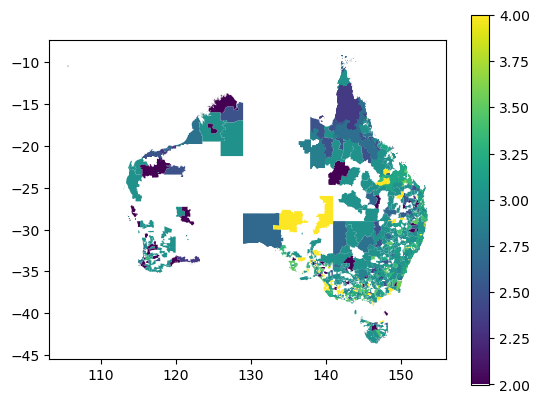

In [65]:
merged = aus.merge(OverallRatings_postcode, how='right',left_on = 'POA_CODE21', right_on = 'Postcode')
merged.plot(column="OverallRating_Numeric", legend=True)
plt.show()

<Axes: >

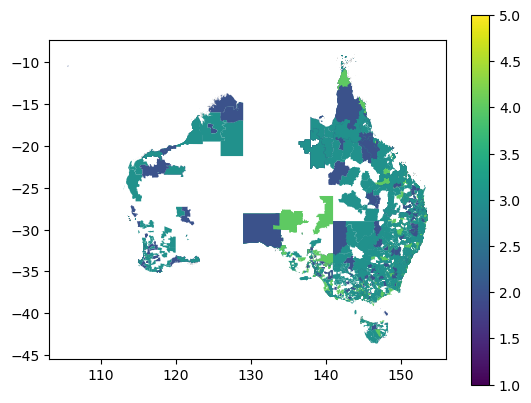

In [66]:
merged = aus.merge(AC,how='right',left_on = 'POA_CODE21', right_on = 'Postcode')
merged.plot(column="OverallRating_Numeric", legend=True)

In [67]:
Service_Count = df.groupby('Postcode').size().reset_index(name='ServiceCount')
Service_Count

,Postcode,ServiceCount
0,2000,18
1,2007,11
2,2008,7
3,2009,4
4,2010,13
...,...,...
1942,7321,1
1943,7322,3
1944,7325,2
1945,7330,3


In [68]:
Service_Count = df.groupby('Postcode')\
                  .size()\
                  .reset_index(name='ServiceCount')

df = df.merge(Service_Count,
              how='left',
              on='Postcode')

print(df[['Postcode', 'ServiceCount']].head())
print(df['ServiceCount'].dtype)


  Postcode  ServiceCount
0     4133            22
1     4207            52
2     4217            17
3     4220            17
4     4211            39
int64


<Figure size 1500x500 with 0 Axes>

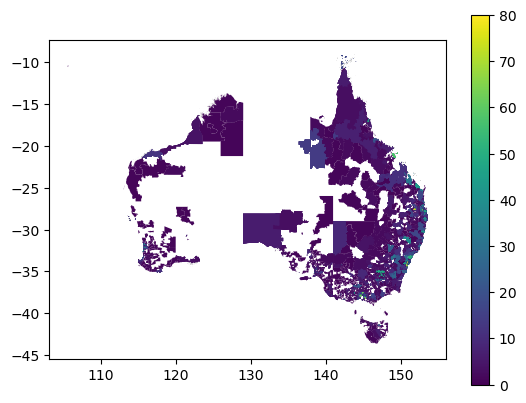

In [69]:
service_density = merged.groupby('Postcode').size().reset_index(name='Service_Count')

merged = merged.merge(service_density, how='left', on='Postcode')

plt.figure(figsize=(15, 5))
merged.plot(column='Service_Count', legend=True, vmin=0, vmax=merged['Service_Count'].max())
plt.show()

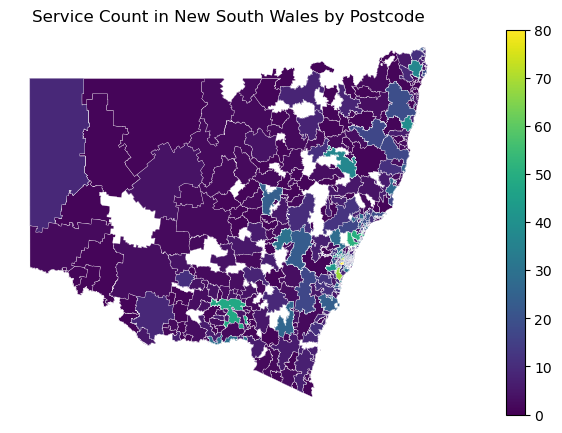

In [70]:
NSW = merged[merged['State'] == 'NSW']

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
NSW.plot(
    column='Service_Count',
    cmap='viridis',
    linewidth=0.2,
    edgecolor='white',
    legend=True,
    vmin=0,
    vmax=merged['Service_Count'].max(),  
    ax=ax
)
ax.set_title("Service Count in New South Wales by Postcode")
ax.axis('off')
plt.show()

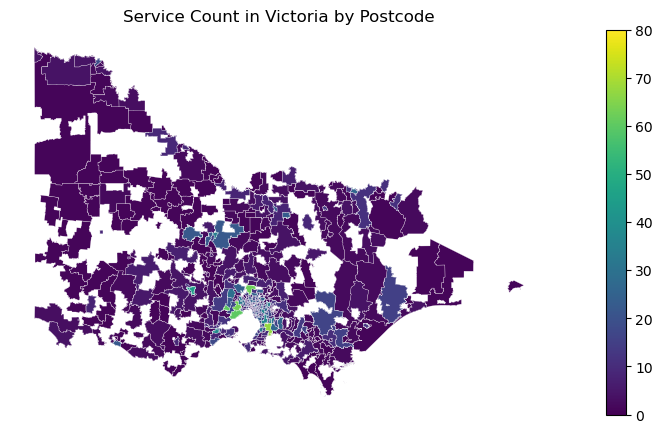

In [71]:
VIC = merged[merged['State'] == 'VIC']

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
VIC.plot(
    column='Service_Count',
    cmap='viridis',
    linewidth=0.2,
    edgecolor='white',
    legend=True,
    vmin=0,
    vmax=merged['Service_Count'].max(),  
    ax=ax
)
ax.set_title("Service Count in Victoria by Postcode")
ax.axis('off')
plt.show()

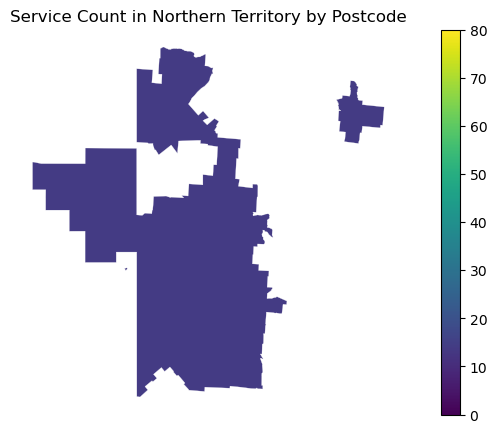

In [72]:
NT = merged[merged['State'] == 'NT']

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
NT.plot(
    column='Service_Count',
    cmap='viridis',
    linewidth=0.2,
    edgecolor='white',
    legend=True,
    vmin=0,
    vmax=merged['Service_Count'].max(),  
    ax=ax
)
ax.set_title("Service Count in Northern Territory by Postcode")
ax.axis('off')
plt.show()

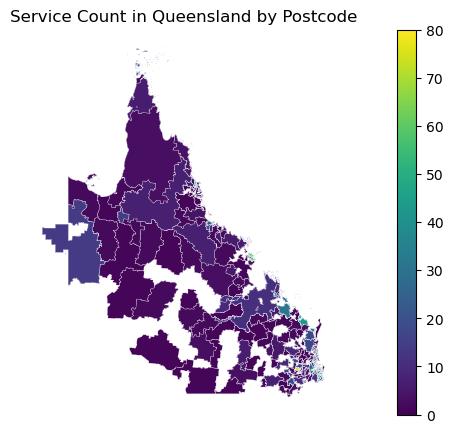

In [73]:
QLD = merged[merged['State'] == 'QLD']

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
QLD.plot(
    column='Service_Count',
    cmap='viridis',
    linewidth=0.2,
    edgecolor='white',
    legend=True,
    vmin=0,
    vmax=merged['Service_Count'].max(),  
    ax=ax
)
ax.set_title("Service Count in Queensland by Postcode")
ax.axis('off')
plt.show()

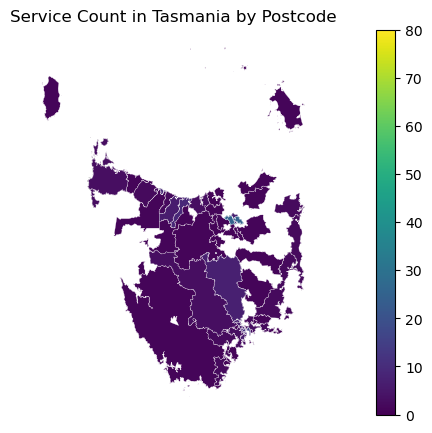

In [74]:
TAS = merged[merged['State'] == 'TAS']

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
TAS.plot(
    column='Service_Count',
    cmap='viridis',
    linewidth=0.2,
    edgecolor='white',
    legend=True,
    vmin=0,
    vmax=merged['Service_Count'].max(),  
    ax=ax
)
ax.set_title("Service Count in Tasmania by Postcode")
ax.axis('off')
plt.show()

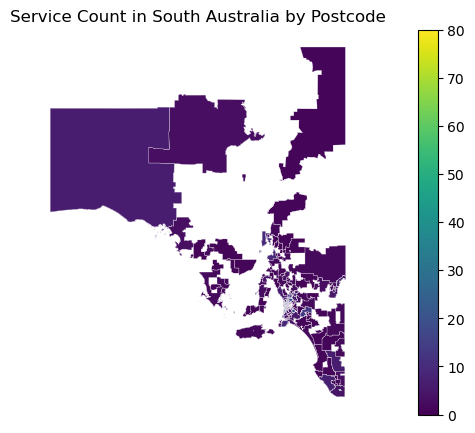

In [75]:
SA = merged[merged['State'] == 'SA']

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
SA.plot(
    column='Service_Count',
    cmap='viridis',
    linewidth=0.2,
    edgecolor='white',
    legend=True,
    vmin=0,
    vmax=merged['Service_Count'].max(),  
    ax=ax
)
ax.set_title("Service Count in South Australia by Postcode")
ax.axis('off')
plt.show()

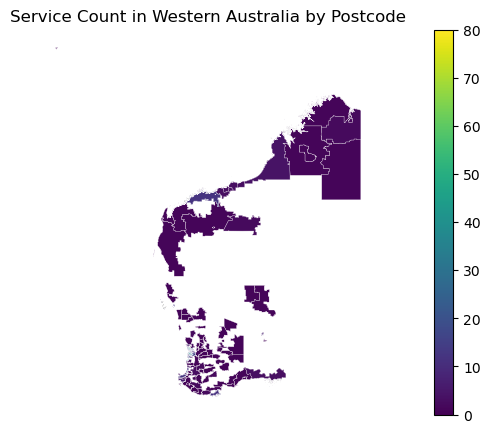

In [76]:
WA = merged[merged['State'] == 'WA']

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
WA.plot(
    column='Service_Count',
    cmap='viridis',
    linewidth=0.2,
    edgecolor='white',
    legend=True,
    vmin=0,
    vmax=merged['Service_Count'].max(),  
    ax=ax
)
ax.set_title("Service Count in Western Australia by Postcode")
ax.axis('off')
plt.show()

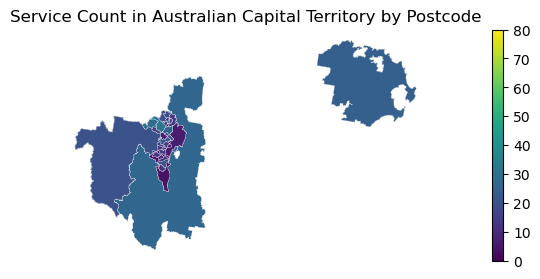

In [77]:
ACT = merged[merged['State'] == 'ACT']

fig, ax = plt.subplots(1, 1, figsize=(15, 3))
ACT.plot(
    column='Service_Count',
    cmap='viridis',
    linewidth=0.2,
    edgecolor='white',
    legend=True,
    vmin=0,
    vmax=merged['Service_Count'].max(),  
    ax=ax
)
ax.set_title("Service Count in Australian Capital Territory by Postcode")
ax.axis('off')
plt.show()

# Q3

In [78]:
OT['year_data'] = OT['ServiceApprovalGrantedDate'].dt.to_period('Y')
yearly_counts = OT['year_data'].value_counts().sort_index()

OT['month'] = OT['ServiceApprovalGrantedDate'].dt.month

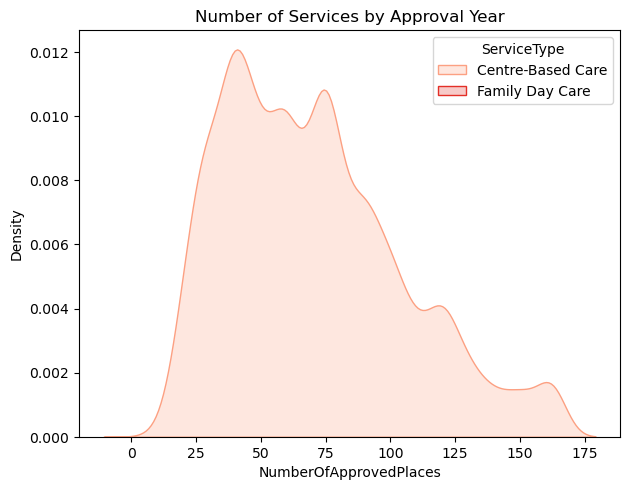

In [79]:
sns.kdeplot(
    data=OT,
    x='NumberOfApprovedPlaces',
    hue='ServiceType',
    palette='Reds',shade = True   
)
plt.tight_layout()
plt.title('Number of Services by Approval Year')
plt.show()

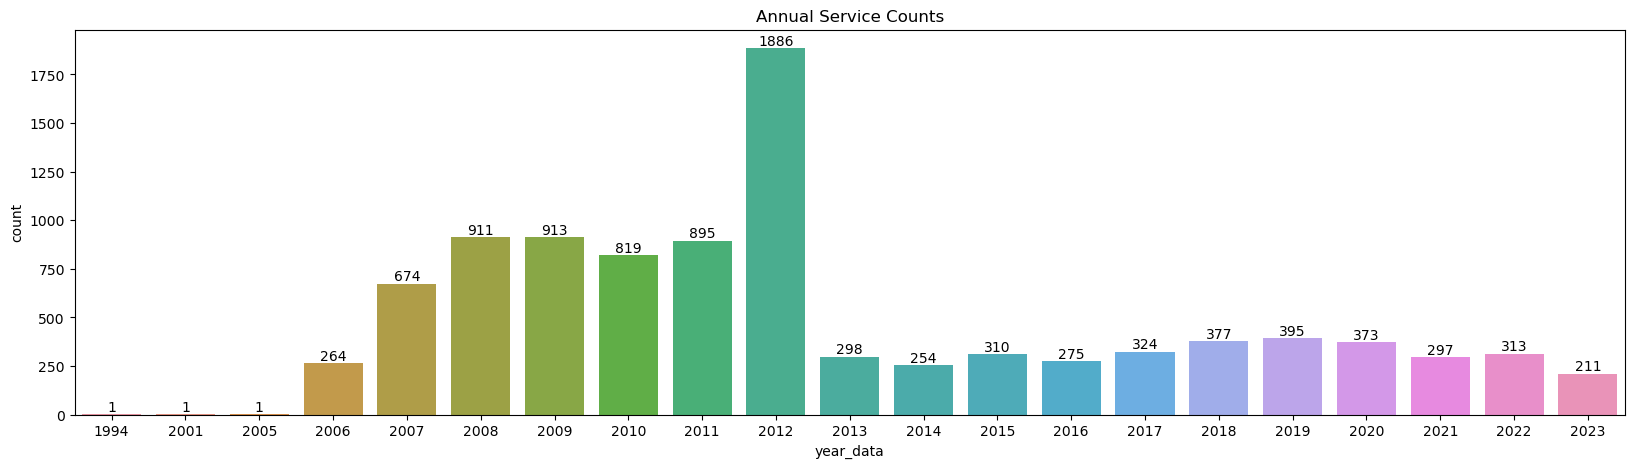

In [80]:
OT['year_data'] = OT['year_data'].astype(str)

order = sorted(OT['year_data'].unique())

plt.figure(figsize=(20,5))
ax = sns.countplot(
    x='year_data',
    data=OT,
    order=order
)
for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation=0)
plt.title('Annual Service Counts')
plt.show()

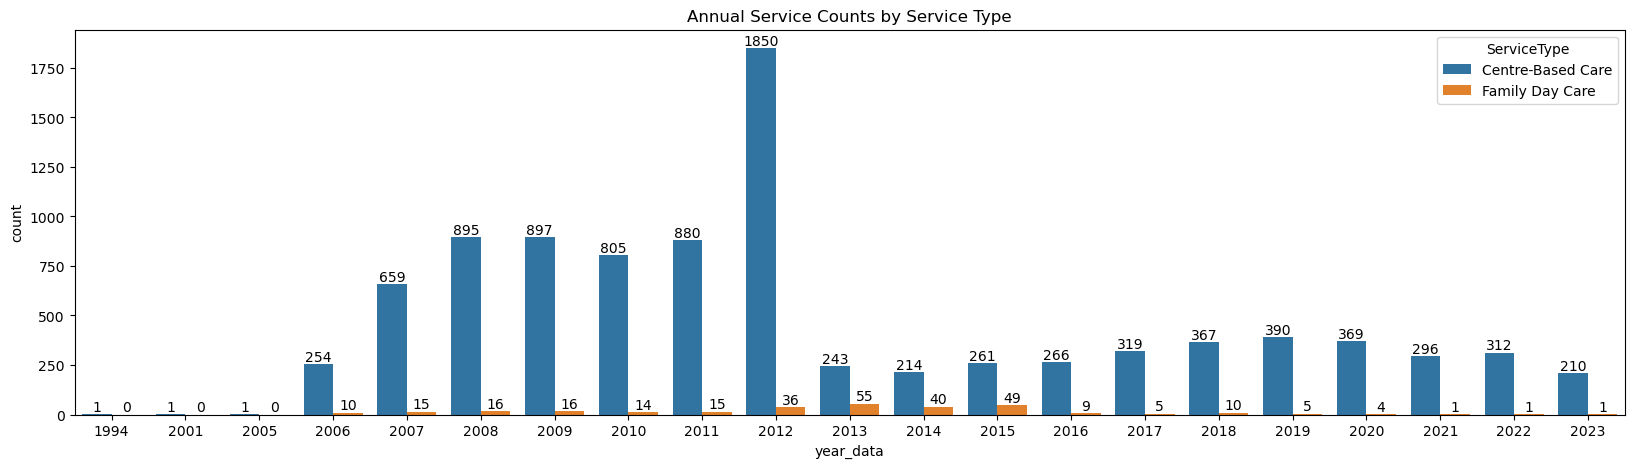

In [81]:
# 1. 把年也都转换成字符串（如果你想在 x 轴上以字符串形式显示）
OT['year_data'] = OT['year_data'].astype(str)

# 2. 拿到排序好的、跟 df 完全一一对应的 categories 列表
order = sorted(OT['year_data'].unique())

# 3. 画图
plt.figure(figsize=(20,5))
ax = sns.countplot(
    x='year_data',
    data=OT,
    hue='ServiceType',
    order=order
)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=0)
plt.title('Annual Service Counts by Service Type')
plt.show()


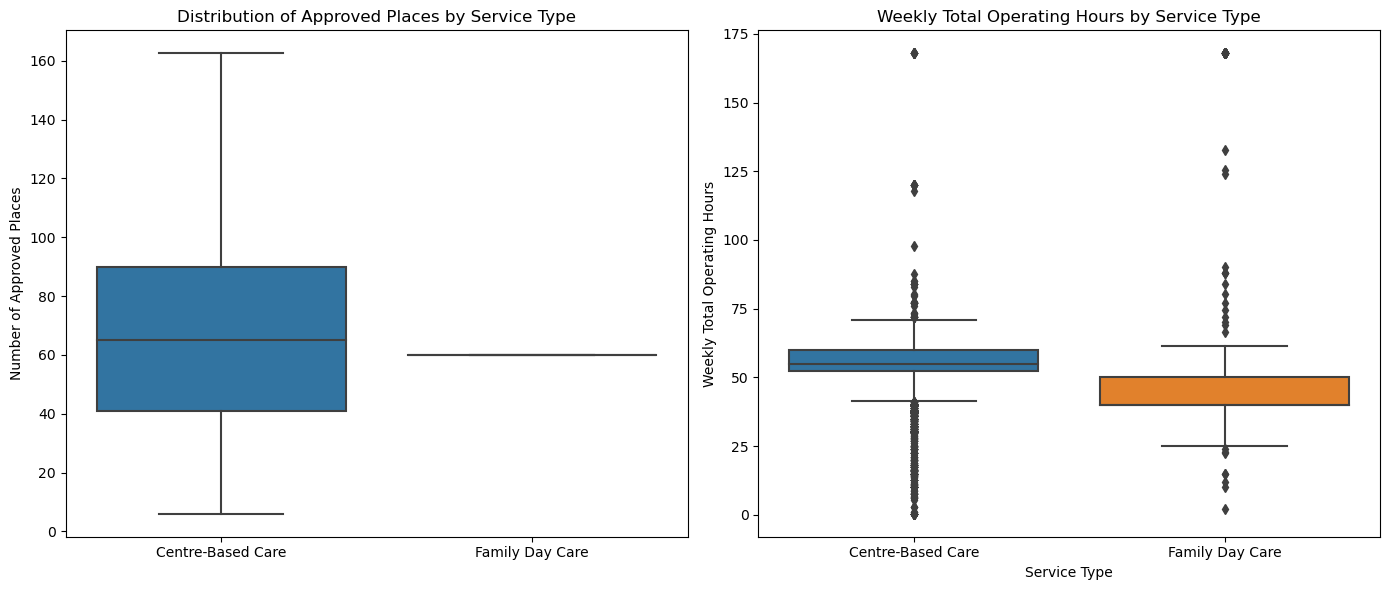

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

sns.boxplot(
    data=OT,
    x='ServiceType',
    y='NumberOfApprovedPlaces',
    ax=axes[0]
)
axes[0].set_title('Distribution of Approved Places by Service Type')
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Approved Places')
axes[0].tick_params(axis='x', rotation=0)

sns.boxplot(
    data=OT,
    x='ServiceType',
    y='Weekly_Total_Hours',
    ax=axes[1]
)
axes[1].set_title('Weekly Total Operating Hours by Service Type')
axes[1].set_xlabel('Service Type')
axes[1].set_ylabel('Weekly Total Operating Hours')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

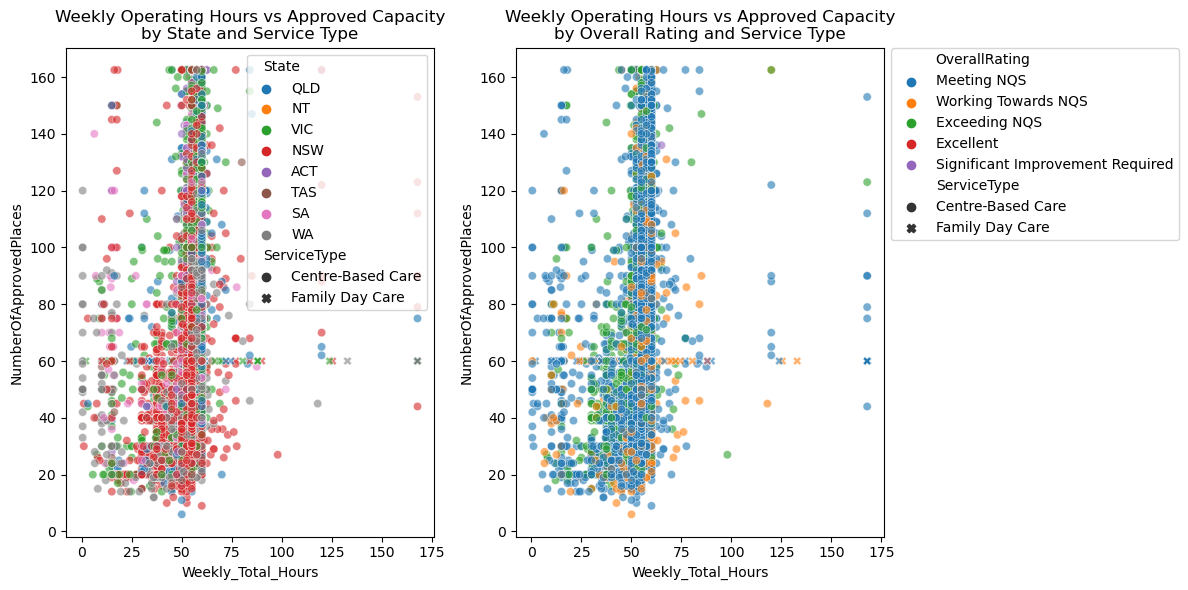

In [83]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

sns.scatterplot(x='Weekly_Total_Hours',y='NumberOfApprovedPlaces',data=OT,hue='State',style ='ServiceType',color='colorblind',alpha=0.6,ax=ax1)
ax1.set_title('Weekly Operating Hours vs Approved Capacity\nby State and Service Type')

sns.scatterplot(x='Weekly_Total_Hours',y='NumberOfApprovedPlaces',data=OT,hue='OverallRating',style ='ServiceType',color='colorblind',alpha=0.6,ax=ax2)
ax2.set_title('Weekly Operating Hours vs Approved Capacity\nby Overall Rating and Service Type')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

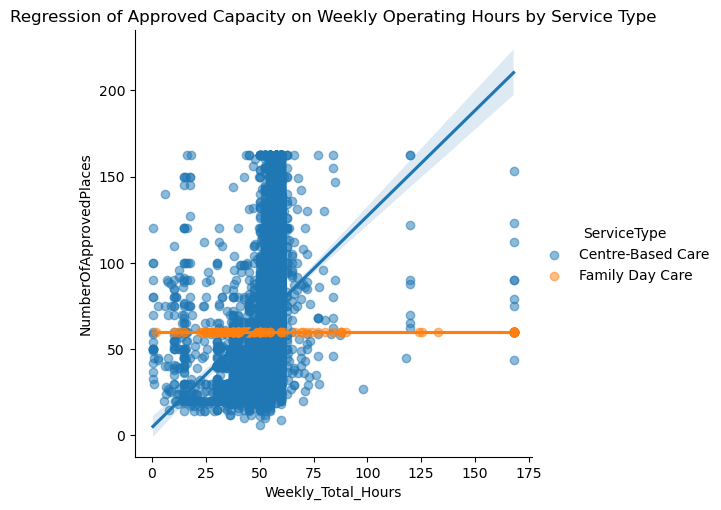

In [84]:
plt.figure(figsize=(10,5))
sns.lmplot(x='Weekly_Total_Hours',y='NumberOfApprovedPlaces',data=OT,hue='ServiceType',fit_reg=True,scatter_kws={'alpha':0.5})

plt.title('Regression of Approved Capacity on Weekly Operating Hours by Service Type')
plt.show()

Text(0.5, 1.0, 'Density Contours of Weekly Operating Hours and Approved Capacity by Service Type')

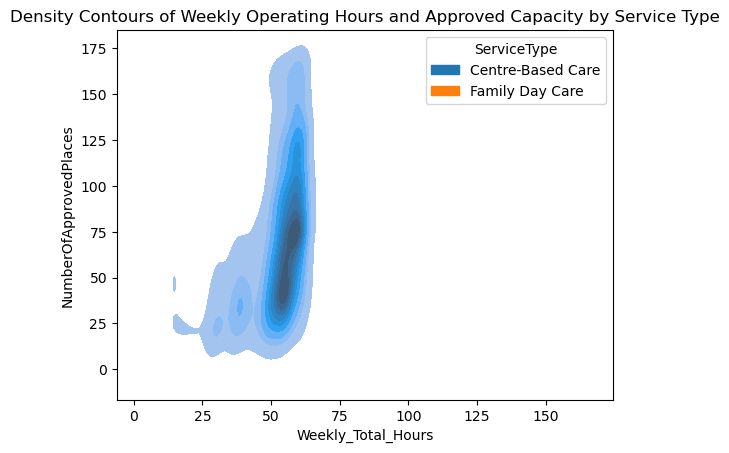

In [85]:
sns.kdeplot(x='Weekly_Total_Hours',y='NumberOfApprovedPlaces',data=OT,hue='ServiceType',shade=True)
plt.title('Density Contours of Weekly Operating Hours and Approved Capacity by Service Type')

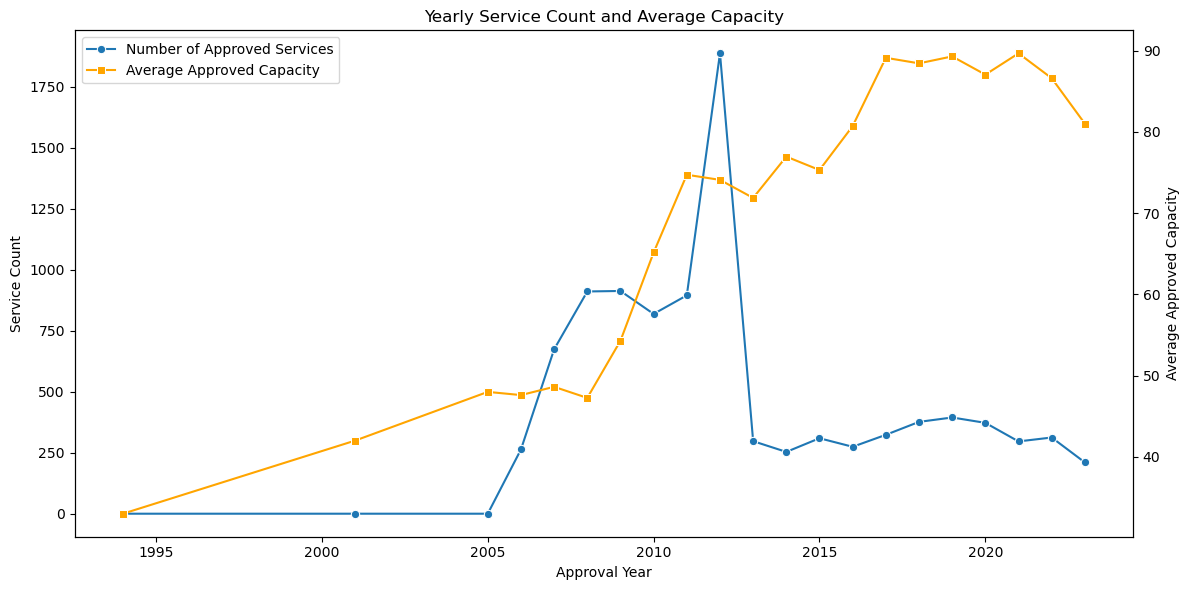

In [86]:
# The Approval_Year column is used to extract the approval year.
OT['Approval_Year'] = pd.to_datetime(
    OT['ServiceApprovalGrantedDate'], errors='coerce'
).dt.year

# Aggregation by year: number of services vs. average capacity
annual = (
    OT
    .dropna(subset=['Approval_Year'])   # Remove unresolvable dates
    .groupby('Approval_Year')
    .agg(
        Service_Count=('Postcode', 'size'),
        Avg_Capacity =('NumberOfApprovedPlaces', 'mean')
    )
    .reset_index()
)

# Drawing a bi-fold line
fig, ax1 = plt.subplots(figsize=(12,6))

# Left axis: number of services
sns.lineplot(
    data=annual,
    x='Approval_Year', y='Service_Count',
    marker='o', ax=ax1,
    label='Number of Approved Services'
    
)
ax1.set_xlabel('Approval Year')
ax1.set_ylabel('Service Count')

# Right axis: average capacity
ax2 = plt.gca().twinx()
sns.lineplot(
    data=annual,
    x='Approval_Year', y='Avg_Capacity',
    marker='s', color='orange', ax=ax2,
    label='Average Approved Capacity',
    legend=False
)
ax2.set_ylabel('Average Approved Capacity')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Title and scale
plt.title('Yearly Service Count and Average Capacity')
plt.tight_layout()
plt.show()

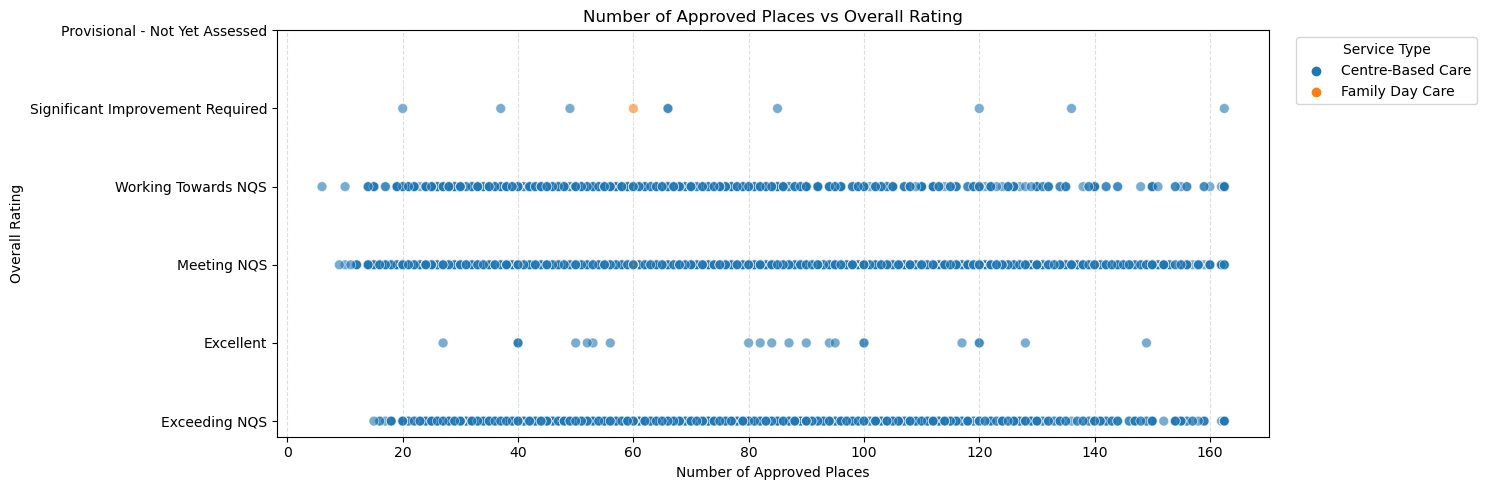

In [87]:
# 1. 定义你的评级顺序
Quality_Rating_Rank = [
    'Exceeding NQS','Excellent','Meeting NQS',
    'Working Towards NQS','Significant Improvement Required',
    'Provisional - Not Yet Assessed'
]

# 2. 映射成 0,25,50,…100
rating_map = {r:i*25 for i,r in enumerate(Quality_Rating_Rank)}
OT['RatingValue'] = OT['OverallRating'].map(rating_map)

# 3. 散点
plt.figure(figsize=(15,5))
sns.scatterplot(
    data=OT,
    x='NumberOfApprovedPlaces',
    y='RatingValue',
    hue='ServiceType',
    palette={'Centre-Based Care':'#1f77b4','Family Day Care':'#ff7f0e'},
    alpha=0.6,
    s=50
)
# 4. 把 Y 轴的刻度换回文字
plt.yticks(
    ticks=list(rating_map.values()),
    labels=list(rating_map.keys()),
    rotation=0
)
plt.title('Number of Approved Places vs Overall Rating')
plt.xlabel('Number of Approved Places')
plt.ylabel('Overall Rating')
plt.legend(title='Service Type', bbox_to_anchor=(1.02,1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()